<h1> Wohunngsanalyse </h1>

<p> Goals: Build a machine learning model to predict house pricing in Germany based on several factors and compare it for the Bundesländer. </p>

The dataset was obtain from Kaggle under the following link:
https://www.kaggle.com/corrieaar/apartment-rental-offers-in-germany

<h3> 1. Import Python Modules </h3>

In [1]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


In [2]:
pd.__version__

'1.1.3'

<h3> 2. Import Data </h3>

In [3]:
#Let's import the dataset and see the first 5 rows as well as the existing columns
housing= pd.read_csv("immo_data.csv")
housing.head(5)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


<h3> 3. Preliminary analysis of the dataset: </h3>


In [4]:
#We could see a preview of the first five rows and some columns of the data set, but let's check  all the columns this dataset contains. 
housing.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

These columns represent the following information:
    
 * regio1: Bundesland
 * serviceCharge: auxiliary costs such as electricity or internet in euros
 *  heatingType: Type of heating
 * telekomTvOffer: Is payed TV included if so which offer
 * telekomHybridUploadSpeed: how fast is the hybrid inter upload speed
 * newlyConst: If the building is a recent construction
 * balcony: Does the property has a balcony?
 * picturecount: how many pictures were uploaded to the listing
 * pricetrend: price trend as calculated by Immoscout
 * telekomUploadSpeed: how fast is the internet upload speed
 * totalRent: total rent (usually a sum of base rent, service charge and heating cost)
 * yearConstructed: construction year
 * scoutid: immoscout Id
 * noParkSpaces: number of parking spaces
 * firingTypes: main energy sources, separated by colon
 * hasKitchen: does the property has a kitchen?
 * geo_bln: bundesland (state), same as regio1
 * cellar: does the property has a cellar?
 * yearConstructed: binned construction year, 1 to 9
 * baseRent: base rent without electricity and heating
 * houseNumber: house number
 * livingSpace: living space in sqm
 * geo_krs: district, above ZIP code
 * condition: condition of the flat 
 * interiorQual: interior quality
 * petsAllowed: are pets allowed, yes/no or negotiable
 * street: street name
 * streetPlain: street name (plain, different formating)
 * lift: is elevator available?
 * baseRentRange: binned base rent, 1 to 9
 * typeOfFlat: type of flat
 * geo_plz: ZIP code
 * noRooms: number of rooms
 * thermalChar: energy need in kWh/m^2a, defines the energy efficiency class
 * floor: which floor is the flat on
 * numberOfFloors: number of floors in the building
 * noRoomsRange: binned number of rooms, 1 to 5
 * garden: does the property has a garden
 * livingSpaceRange: binned living space, 1 to 7
 * regio2: District or Kreis, same as geo krs
 * regio3: City/town
 * description: free text description of the object 
 * facilities: free text description about available facilities
 * heatingCosts: monthly heating costs in euros
 * energyEfficiency: energy efficiency class (based on binned thermalChar, deprecated since Feb 2020)
 * lastRefurbish: year of last renovation
 * electricityBasPrice: monthly base price for electricity in euro (deprectaded since Feb 2020)
 * electricityKwhPrice: electricity price peer kwh (deprecated since Feb 2020)
 * date: time of scraping
 

In [5]:
print(housing.shape)
print(housing.info())

(268850, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052

We have 49 columns and 268,850 rows in the dataset, from which 6 columns are yes or no, 18 have values with decimal points, 6 have integer numbers, and 19 are marked as object. Now let's check which of the columns have 0 values in them:

In [6]:
housing.isnull().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

With this matrix we can quickly see which columns have missing data. We can see for example that for telekomHybridUploadSpeed there are a lot of missing values, as well as for the last five columns before date. So now we will remove the Nan values in some of the columns to get a more compact dataset:

<AxesSubplot:>

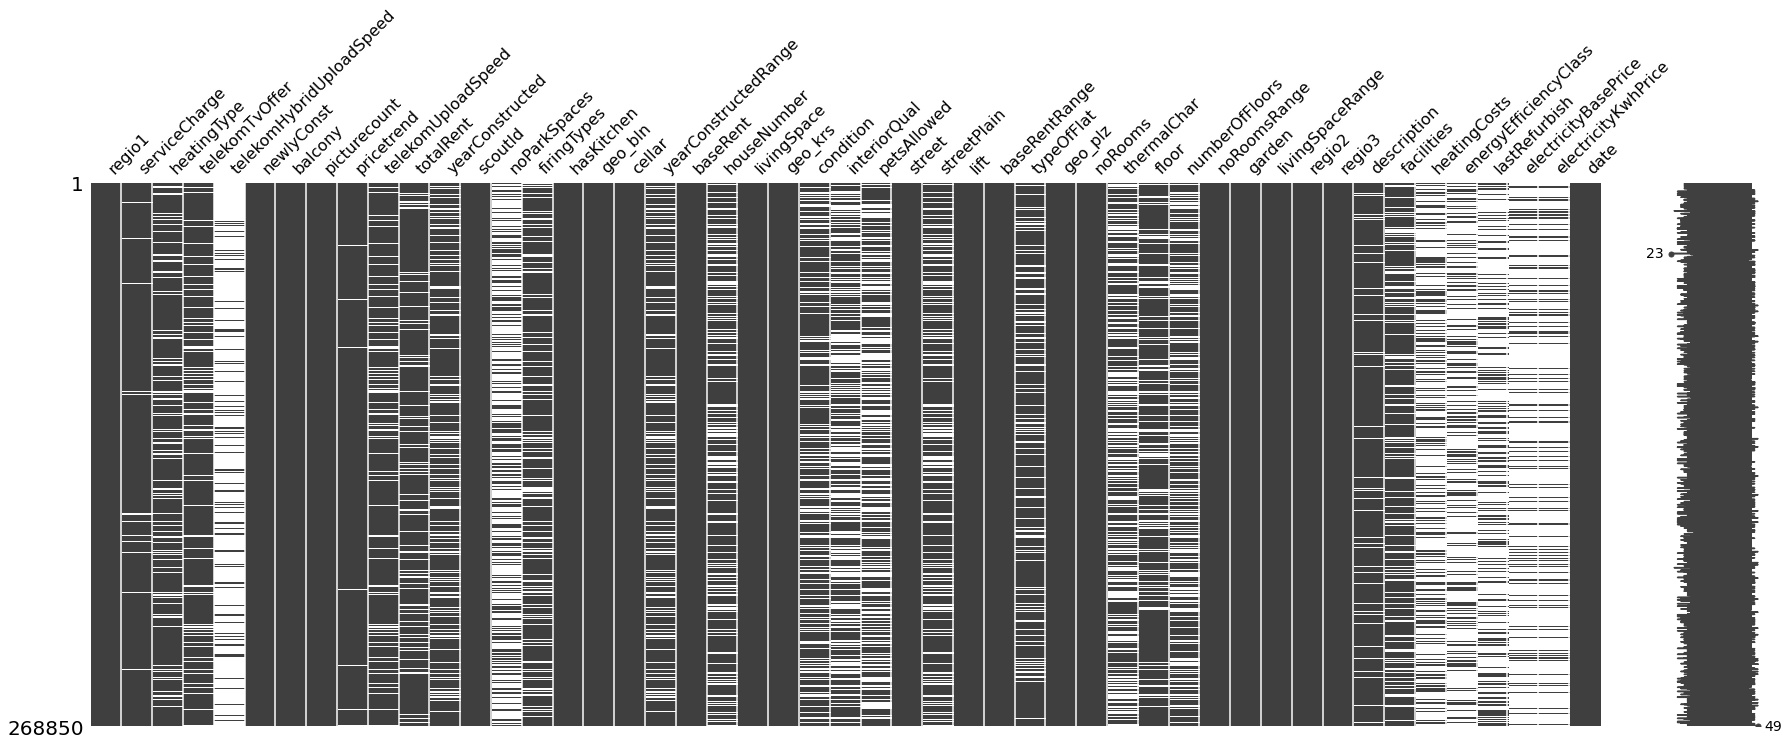

In [7]:
#Plot graphic of missing values (if there is any missing data)
import missingno
missingno.matrix(housing,figsize =(30,10))

We are making a new subset from the data set dropping certain columns with missing values, so we can work the dataset better and get more accurate results.

In [8]:
#Making a new data set keeping the columns I am interested in
housing_subset= housing[['regio1', 'serviceCharge', 'heatingType','newlyConst', 'balcony',  'totalRent', 'yearConstructed', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',  'baseRent',  'livingSpace',  'condition', 'interiorQual', 'petsAllowed','lift',  'typeOfFlat',  'noRooms',  'floor', 'numberOfFloors',  'noRoomsRange', 'garden',   'heatingCosts', 'energyEfficiencyClass','lastRefurbish', 'electricityBasePrice', 'date']]
housing_subset

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,typeOfFlat,noRooms,floor,numberOfFloors,noRoomsRange,garden,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,date
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0,1965.0,1.0,oil,False,Nordrhein_Westfalen,True,595.0,86.00,well_kept,normal,NaN,False,ground_floor,4.0,1.0,3.0,4,True,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,NaN,1871.0,2.0,gas,False,Rheinland_Pfalz,False,800.0,89.00,refurbished,normal,no,False,ground_floor,3.0,NaN,NaN,3,False,NaN,NaN,2019.0,NaN,May19
2,Sachsen,255.00,floor_heating,True,True,1300.0,2019.0,1.0,NaN,False,Sachsen,True,965.0,83.80,first_time_use,sophisticated,NaN,True,apartment,3.0,3.0,4.0,3,False,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,False,True,NaN,1964.0,NaN,district_heating,False,Sachsen,False,343.0,58.15,NaN,NaN,NaN,False,other,3.0,3.0,NaN,3,False,87.23,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,False,True,903.0,1950.0,NaN,gas,False,Bremen,False,765.0,84.97,refurbished,NaN,NaN,False,apartment,3.0,1.0,NaN,3,False,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,False,True,910.0,2016.0,1.0,geothermal,False,Bayern,True,820.0,90.00,mint_condition,sophisticated,no,False,roof_storey,3.0,NaN,NaN,3,False,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,False,True,1150.0,1983.0,1.0,gas,True,Hessen,False,930.0,115.00,well_kept,sophisticated,negotiable,False,apartment,3.5,1.0,1.0,3,False,NaN,NaN,2015.0,NaN,May19
268847,Hessen,220.00,central_heating,False,True,930.0,1965.0,1.0,gas,False,Hessen,True,650.0,95.00,well_kept,NaN,negotiable,False,apartment,4.0,1.0,2.0,4,True,NaN,NaN,2019.0,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015.0,2019.0,1.0,gas,False,Nordrhein_Westfalen,True,840.0,70.00,first_time_use,sophisticated,no,True,apartment,2.0,NaN,5.0,2,False,40.00,NO_INFORMATION,2019.0,NaN,May19


In [9]:
#Let's describe it to get a general feeling of the dataset to see a general picture 

housing_subset.describe()

,serviceCharge,totalRent,yearConstructed,noParkSpaces,baseRent,livingSpace,noRooms,floor,numberOfFloors,noRoomsRange,heatingCosts,lastRefurbish,electricityBasePrice
count,261941.000000,2.283330e+05,211805.000000,93052.000000,2.688500e+05,268850.000000,268850.000000,217541.000000,171118.000000,268850.000000,85518.000000,80711.000000,46846.000000
mean,151.206113,9.013315e+02,1966.400590,1.327634,6.941294e+02,74.355548,2.641261,2.122405,3.572319,2.571542,76.990866,2013.904536,89.113612
std,308.295790,3.323833e+04,46.992207,8.361403,1.953602e+04,254.759208,2.633440,3.634934,6.375496,0.937594,147.716278,10.963125,5.395805
min,0.000000,0.000000e+00,1000.000000,0.000000,0.000000e+00,0.000000,1.000000,-1.000000,0.000000,1.000000,0.000000,1015.000000,71.430000
25%,95.000000,4.698000e+02,1950.000000,1.000000,3.380000e+02,54.000000,2.000000,1.000000,2.000000,2.000000,54.000000,2012.000000,90.760000
50%,135.000000,6.500000e+02,1973.000000,1.000000,4.900000e+02,67.320000,3.000000,2.000000,3.000000,3.000000,70.000000,2017.000000,90.760000
75%,190.000000,9.850000e+02,1996.000000,1.000000,7.990000e+02,87.000000,3.000000,3.000000,4.000000,3.000000,90.000000,2019.000000,90.760000
max,146118.000000,1.575154e+07,2090.000000,2241.000000,9.999999e+06,111111.000000,999.990000,999.000000,999.000000,5.000000,12613.000000,2919.000000,90.760000


In [10]:
#are there missing values in the sub set ?
housing_subset.isna().sum()

regio1                        0
serviceCharge              6909
heatingType               44856
newlyConst                    0
balcony                       0
totalRent                 40517
yearConstructed           57045
noParkSpaces             175798
firingTypes               56964
hasKitchen                    0
geo_bln                       0
cellar                        0
baseRent                      0
livingSpace                   0
condition                 68489
interiorQual             112665
petsAllowed              114573
lift                          0
typeOfFlat                36614
noRooms                       0
floor                     51309
numberOfFloors            97732
noRoomsRange                  0
garden                        0
heatingCosts             183332
energyEfficiencyClass    191063
lastRefurbish            188139
electricityBasePrice     222004
date                          0
dtype: int64

In [11]:
housing_subset[housing_subset.isnull().any(axis=1)]

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,typeOfFlat,noRooms,floor,numberOfFloors,noRoomsRange,garden,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,date
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0,1965.0,1.0,oil,False,Nordrhein_Westfalen,True,595.0,86.00,well_kept,normal,NaN,False,ground_floor,4.0,1.0,3.0,4,True,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,NaN,1871.0,2.0,gas,False,Rheinland_Pfalz,False,800.0,89.00,refurbished,normal,no,False,ground_floor,3.0,NaN,NaN,3,False,NaN,NaN,2019.0,NaN,May19
2,Sachsen,255.00,floor_heating,True,True,1300.0,2019.0,1.0,NaN,False,Sachsen,True,965.0,83.80,first_time_use,sophisticated,NaN,True,apartment,3.0,3.0,4.0,3,False,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,False,True,NaN,1964.0,NaN,district_heating,False,Sachsen,False,343.0,58.15,NaN,NaN,NaN,False,other,3.0,3.0,NaN,3,False,87.23,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,False,True,903.0,1950.0,NaN,gas,False,Bremen,False,765.0,84.97,refurbished,NaN,NaN,False,apartment,3.0,1.0,NaN,3,False,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,False,True,910.0,2016.0,1.0,geothermal,False,Bayern,True,820.0,90.00,mint_condition,sophisticated,no,False,roof_storey,3.0,NaN,NaN,3,False,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,False,True,1150.0,1983.0,1.0,gas,True,Hessen,False,930.0,115.00,well_kept,sophisticated,negotiable,False,apartment,3.5,1.0,1.0,3,False,NaN,NaN,2015.0,NaN,May19
268847,Hessen,220.00,central_heating,False,True,930.0,1965.0,1.0,gas,False,Hessen,True,650.0,95.00,well_kept,NaN,negotiable,False,apartment,4.0,1.0,2.0,4,True,NaN,NaN,2019.0,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015.0,2019.0,1.0,gas,False,Nordrhein_Westfalen,True,840.0,70.00,first_time_use,sophisticated,no,True,apartment,2.0,NaN,5.0,2,False,40.00,NO_INFORMATION,2019.0,NaN,May19


<AxesSubplot:>

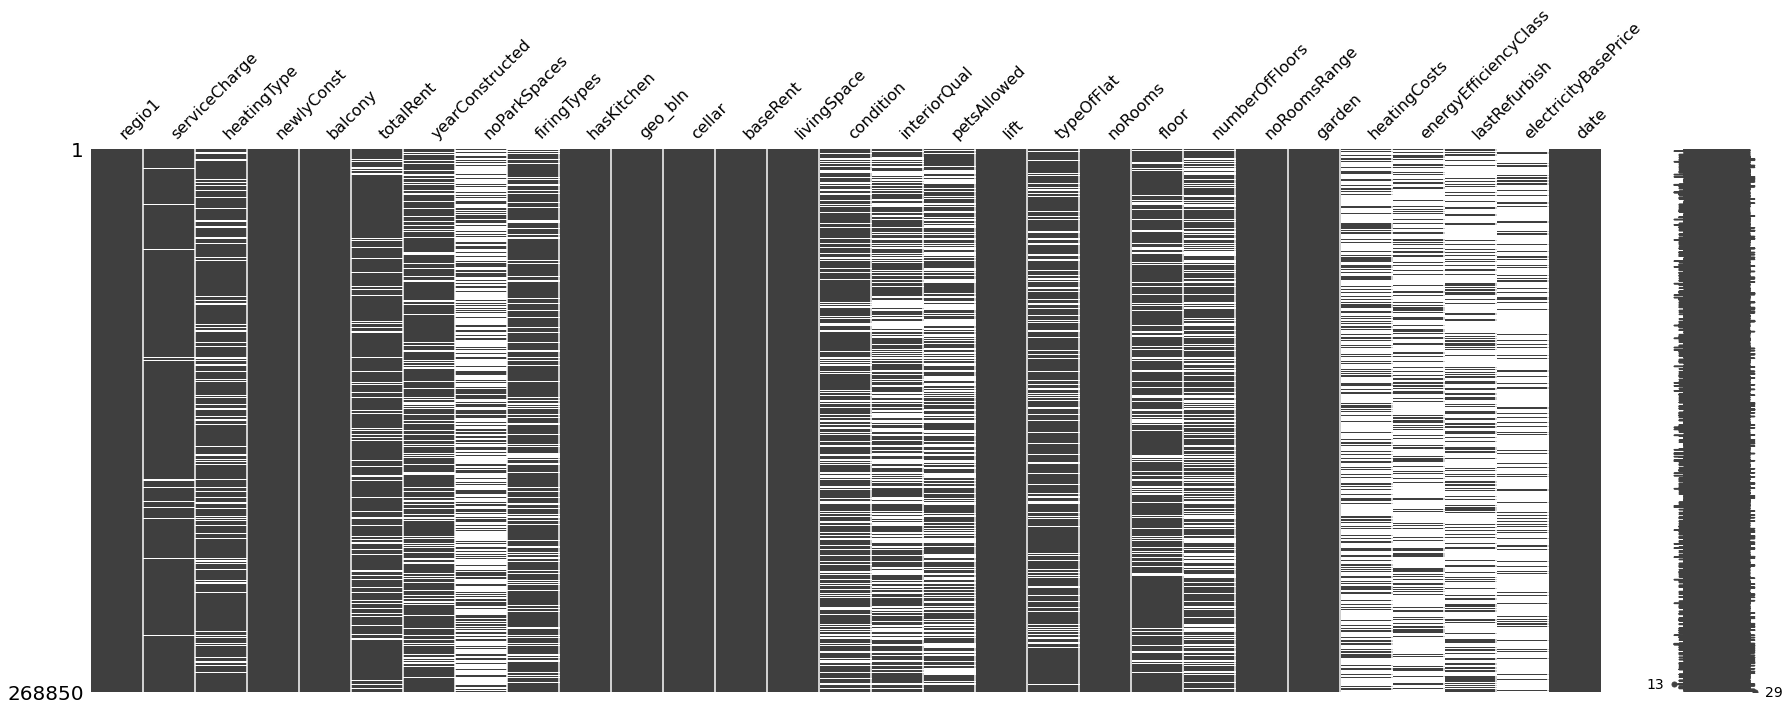

In [12]:
#Plot graphic of missing values (if there is any missing data)
import missingno
missingno.matrix(housing_subset,figsize =(30,10))

In [13]:
#how does it look like when electricity Base Price doesn't have any value.
housing_subset[housing_subset['electricityBasePrice'].isna()]

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,typeOfFlat,noRooms,floor,numberOfFloors,noRoomsRange,garden,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,date
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0,1965.0,1.0,oil,False,Nordrhein_Westfalen,True,595.0,86.00,well_kept,normal,NaN,False,ground_floor,4.0,1.0,3.0,4,True,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,NaN,1871.0,2.0,gas,False,Rheinland_Pfalz,False,800.0,89.00,refurbished,normal,no,False,ground_floor,3.0,NaN,NaN,3,False,NaN,NaN,2019.0,NaN,May19
2,Sachsen,255.00,floor_heating,True,True,1300.0,2019.0,1.0,NaN,False,Sachsen,True,965.0,83.80,first_time_use,sophisticated,NaN,True,apartment,3.0,3.0,4.0,3,False,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,False,True,NaN,1964.0,NaN,district_heating,False,Sachsen,False,343.0,58.15,NaN,NaN,NaN,False,other,3.0,3.0,NaN,3,False,87.23,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,False,True,903.0,1950.0,NaN,gas,False,Bremen,False,765.0,84.97,refurbished,NaN,NaN,False,apartment,3.0,1.0,NaN,3,False,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,False,True,910.0,2016.0,1.0,geothermal,False,Bayern,True,820.0,90.00,mint_condition,sophisticated,no,False,roof_storey,3.0,NaN,NaN,3,False,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,False,True,1150.0,1983.0,1.0,gas,True,Hessen,False,930.0,115.00,well_kept,sophisticated,negotiable,False,apartment,3.5,1.0,1.0,3,False,NaN,NaN,2015.0,NaN,May19
268847,Hessen,220.00,central_heating,False,True,930.0,1965.0,1.0,gas,False,Hessen,True,650.0,95.00,well_kept,NaN,negotiable,False,apartment,4.0,1.0,2.0,4,True,NaN,NaN,2019.0,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015.0,2019.0,1.0,gas,False,Nordrhein_Westfalen,True,840.0,70.00,first_time_use,sophisticated,no,True,apartment,2.0,NaN,5.0,2,False,40.00,NO_INFORMATION,2019.0,NaN,May19


In [14]:
#We are droping all missing values from the Dataset to see how it would look like, and how much would 
#it change the summary statistics from the original one 
housing_ohne_nan = housing_subset.dropna()

In [15]:
#Lets describe this dataset without missing values
housing_ohne_nan.describe()

,serviceCharge,totalRent,yearConstructed,noParkSpaces,baseRent,livingSpace,noRooms,floor,numberOfFloors,noRoomsRange,heatingCosts,lastRefurbish,electricityBasePrice
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,132.031234,940.245649,1972.129870,1.616883,736.992662,84.241169,2.879870,1.870130,3.181818,2.844156,86.672857,2013.389610,89.504805
std,78.113656,555.489670,40.021677,3.778505,478.135756,30.610051,0.846089,1.336767,1.340444,0.833372,48.093261,5.891516,4.778670
min,26.000000,0.000000,1880.000000,0.000000,185.600000,35.240000,1.000000,0.000000,0.000000,1.000000,0.000000,1995.000000,71.430000
25%,80.000000,536.250000,1955.000000,1.000000,380.000000,63.152500,2.000000,1.000000,2.000000,2.000000,60.000000,2011.000000,90.760000
50%,110.000000,850.500000,1978.500000,1.000000,658.500000,77.735000,3.000000,2.000000,3.000000,3.000000,80.000000,2016.000000,90.760000
75%,170.000000,1150.000000,2012.000000,1.000000,909.607500,100.750000,3.000000,3.000000,4.000000,3.000000,100.000000,2018.000000,90.760000
max,490.000000,3755.000000,2018.000000,31.000000,3200.000000,253.000000,5.000000,6.000000,7.000000,5.000000,280.000000,2018.000000,90.760000


(154, 29)


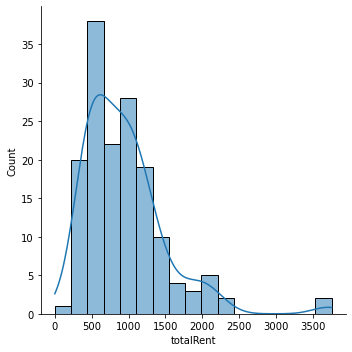

In [16]:
#sns.histplot(housing_ohne_nan.totalRent)
sns.displot(data=housing_ohne_nan, x="totalRent", kde=True)
print(housing_ohne_nan.shape)

In [17]:
# I want to know the most frequent value in the YearConstructed column
housing_subset['yearConstructed'].mode()
housing_subset['floor'].mode()
housing_subset['numberOfFloors'].mode()
housing_subset['heatingCosts'].mean()
housing_subset['energyEfficiencyClass'].mode()
housing_subset['lastRefurbish'].mode()
housing_subset['electricityBasePrice'].mean()


89.11361183442983

In [18]:
#Let's calculate the most frequent value for all columns in housing_subset through iteration 
modes=[]
for col in housing_subset.columns:
    top_values=[]
    top_values=housing_subset[col].mode()
    modes.append(pd.DataFrame({col: top_values}).reset_index(drop=True))
    pd.concat(modes, axis=1)
   

In [19]:
#Let's print it and check the values 
display(modes)

[                regio1
 0  Nordrhein_Westfalen,
    serviceCharge
 0          150.0,
        heatingType
 0  central_heating,
    newlyConst
 0       False,
    balcony
 0     True,
    totalRent
 0      500.0,
    yearConstructed
 0           2019.0,
    noParkSpaces
 0           1.0,
   firingTypes
 0         gas,
    hasKitchen
 0       False,
                geo_bln
 0  Nordrhein_Westfalen,
    cellar
 0    True,
    baseRent
 0     350.0,
    livingSpace
 0         60.0,
    condition
 0  well_kept,
   interiorQual
 0       normal,
   petsAllowed
 0  negotiable,
     lift
 0  False,
   typeOfFlat
 0  apartment,
    noRooms
 0      3.0,
    floor
 0    1.0,
    numberOfFloors
 0             3.0,
    noRoomsRange
 0             3,
    garden
 0   False,
    heatingCosts
 0          60.0,
   energyEfficiencyClass
 0                     C,
    lastRefurbish
 0         2019.0,
    electricityBasePrice
 0                 90.76,
     date
 0  Feb20]

In [20]:
#Let's keep trying to tidy the dataset this time I will drop other values using a dictionary with the columns and fillna 
tidy_housing= housing_subset.fillna({'serviceCharge':0, 'heatingType': 'unknown', 'totalRent': 940, 'yearConstructed': 2017, 'noParkSpaces': 0,'firingTypes': 'unknown', 'condition':'unknown', 'petsAllowed':'no','typeOfFlat':'unknown', 'floor':1, 'numberOfFloors': 3, 'heatingCosts':86,'energyEfficiencyClass':'NO_INFORMATION','lastRefurbish':2018,'electricityBasePrice':90,'interiorQual':'normal'})
tidy_housing.isna().sum()

regio1                   0
serviceCharge            0
heatingType              0
newlyConst               0
balcony                  0
totalRent                0
yearConstructed          0
noParkSpaces             0
firingTypes              0
hasKitchen               0
geo_bln                  0
cellar                   0
baseRent                 0
livingSpace              0
condition                0
interiorQual             0
petsAllowed              0
lift                     0
typeOfFlat               0
noRooms                  0
floor                    0
numberOfFloors           0
noRoomsRange             0
garden                   0
heatingCosts             0
energyEfficiencyClass    0
lastRefurbish            0
electricityBasePrice     0
date                     0
dtype: int64

In [21]:
#Let's describe this new tidy dataset 
tidy_housing.describe()

,serviceCharge,totalRent,yearConstructed,noParkSpaces,baseRent,livingSpace,noRooms,floor,numberOfFloors,noRoomsRange,heatingCosts,lastRefurbish,electricityBasePrice
count,268850.000000,2.688500e+05,268850.000000,268850.000000,2.688500e+05,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000
mean,147.320366,9.071590e+02,1977.136850,0.459509,6.941294e+02,74.355548,2.641261,1.908198,3.364270,2.571542,83.134301,2016.770508,89.845551
std,305.247775,3.063151e+04,46.558511,4.959480,1.953602e+04,254.759208,2.633440,3.299345,5.093796,0.937594,83.416215,6.293287,2.277296
min,0.000000,0.000000e+00,1000.000000,0.000000,0.000000e+00,0.000000,1.000000,-1.000000,0.000000,1.000000,0.000000,1015.000000,71.430000
25%,90.000000,4.950000e+02,1958.000000,0.000000,3.380000e+02,54.000000,2.000000,1.000000,3.000000,2.000000,86.000000,2018.000000,90.000000
50%,131.000000,7.410000e+02,1986.000000,0.000000,4.900000e+02,67.320000,3.000000,1.000000,3.000000,3.000000,86.000000,2018.000000,90.000000
75%,185.000000,9.400000e+02,2017.000000,1.000000,7.990000e+02,87.000000,3.000000,3.000000,4.000000,3.000000,86.000000,2018.000000,90.000000
max,146118.000000,1.575154e+07,2090.000000,2241.000000,9.999999e+06,111111.000000,999.990000,999.000000,999.000000,5.000000,12613.000000,2919.000000,90.760000


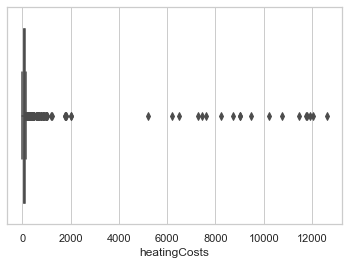

In [22]:
#How to check and remove outliers?

#Let's create a histograme to see the distribution of the data
#how can I specifify the numerical values and give it a scale? 
#sns.displot(housing_subset, x="heatingCosts", kind="kde")


sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=housing_subset["heatingCosts"])

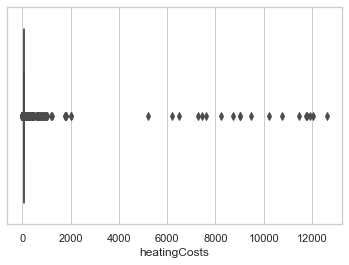

In [23]:

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=tidy_housing["heatingCosts"])

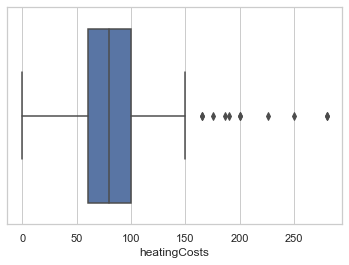

In [24]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=housing_ohne_nan["heatingCosts"])

In [25]:
#Let's remove the outlier from the data
Q1 = tidy_housing.totalRent.quantile(0.25)
Q3=  tidy_housing.totalRent.quantile(0.75)
Q1,Q3

(495.0, 940.0)

In [26]:
IQR = Q3-Q1
IQR

445.0

In [27]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-172.5, 1607.5)

In [28]:
tidy_housing[(tidy_housing.totalRent<lower_limit) | (tidy_housing.totalRent)>upper_limit]

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,typeOfFlat,noRooms,floor,numberOfFloors,noRoomsRange,garden,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,date


In [29]:
df_no_outlier = tidy_housing[(tidy_housing.totalRent>lower_limit)&(tidy_housing.totalRent<upper_limit)]



In [30]:
df_no_outlier.totalRent.max()

1607.22

<AxesSubplot:xlabel='livingSpace'>

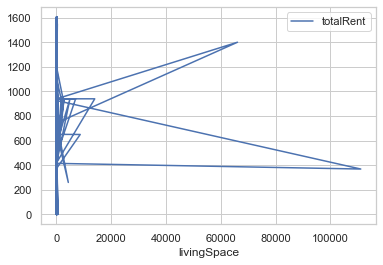

In [31]:
#We still have some big values for our x axis 
df_no_outlier[['totalRent','livingSpace']].plot( x='livingSpace' , y='totalRent')


In [32]:
#Let's check the outliers for this data


adapted_rent= tidy_housing[(tidy_housing.totalRent >=0) & (tidy_housing.totalRent<2000)]
adapted_rent= tidy_housing[(tidy_housing.livingSpace <150)& (tidy_housing.livingSpace>0)]


In [33]:
def remove_outliers(tidy_housing,columns,n_std):
    for col in columns:
        print('Working on column {}'.formal(col))
        mean = tidy_housing[col].mean()
        sd = tidy_housing[col].std()
        tidy_housing = tidy_housing[(tidy_housing[col] <= mean+(n_std*sd))]
        return tidy_housing

<AxesSubplot:xlabel='livingSpace'>

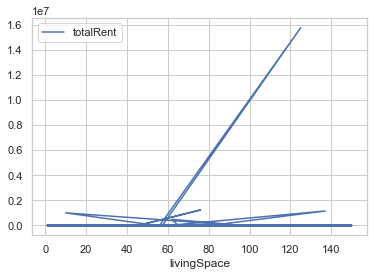

In [34]:
# Let's visualize this 
adapted_rent[['totalRent','livingSpace']].plot( x='livingSpace' , y='totalRent')



In [35]:
# define a function called "plot_boxplot"

def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

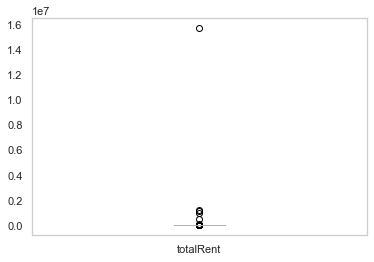

In [36]:
plot_boxplot(tidy_housing,'totalRent')

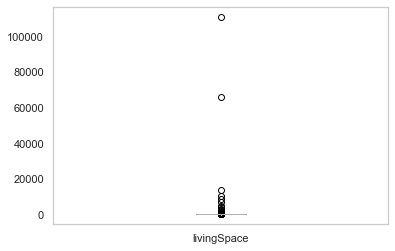

In [37]:
plot_boxplot(tidy_housing,'livingSpace')

In [38]:
#Remove the outliers from all the colums

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3- Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    return ls 

In [39]:
# create an empty list to store the output indices from multiple columns

index_list = []
for feature in ['serviceCharge','totalRent','yearConstructed','noParkSpaces','livingSpace','noRooms']:
    index_list.extend(outliers(tidy_housing, feature))

In [40]:
# create an empty list to store the output indices from multiple columns

index_list_h = []
for feature in ['serviceCharge','totalRent','yearConstructed','noParkSpaces','livingSpace','noRooms']:
    index_list.extend(outliers(housing_ohne_nan, feature))

In [41]:
# define a function called "remove" which returns a. cleaned dataframe without outliers

def remove(df, ls):
    ls = sorted(set(ls))
    df= df.drop(ls)
    return df

In [42]:
tidy_housing_cleaned = remove(tidy_housing, index_list)

In [43]:
tidy_housing_nan = remove(housing_ohne_nan, index_list_h)

In [44]:
tidy_housing_cleaned .shape

(239774, 29)

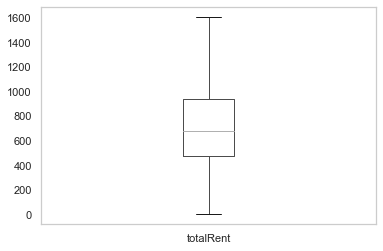

In [45]:
plot_boxplot(tidy_housing_cleaned ,'totalRent')

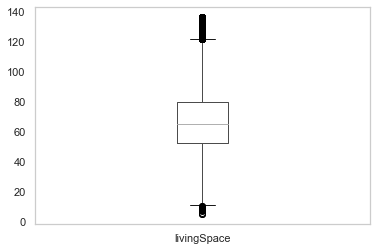

In [46]:
plot_boxplot(tidy_housing_cleaned ,'livingSpace')

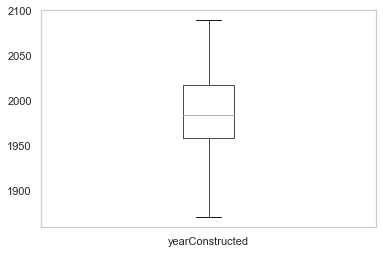

In [47]:
plot_boxplot(tidy_housing_cleaned , 'yearConstructed')

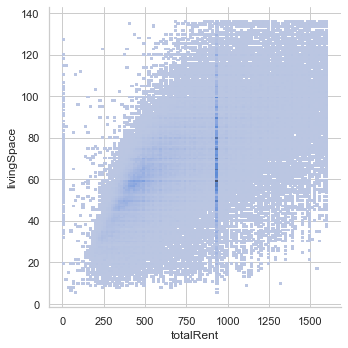

In [48]:

sns.displot(data=tidy_housing_cleaned , x="totalRent", y="livingSpace")

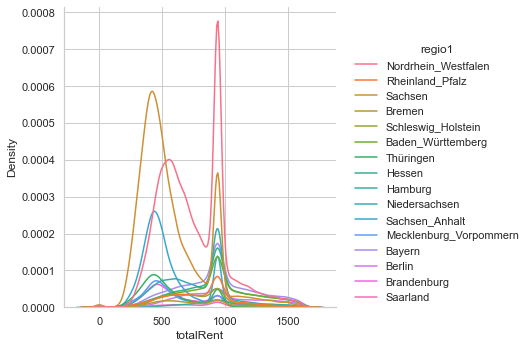

In [49]:
sns.displot(data=tidy_housing_cleaned , x="totalRent", hue="regio1", kind="kde")

/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


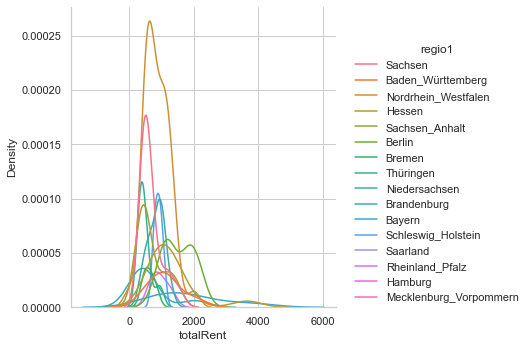

In [50]:
#Let's compare if the dataset without Nan and the cleaned one, throw similar results: 

sns.displot(data=housing_ohne_nan, x="totalRent", hue="regio1", kind="kde")


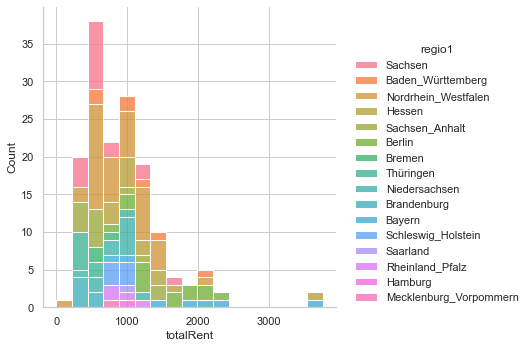

In [51]:
sns.displot(data=housing_ohne_nan, x="totalRent", hue="regio1", multiple="stack")

<AxesSubplot:xlabel='totalRent', ylabel='Density'>

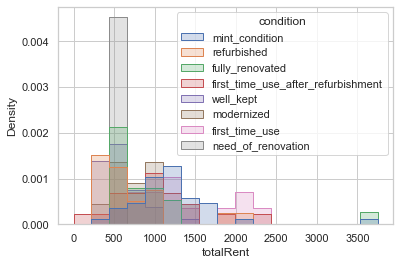

In [52]:
sns.histplot(
    housing_ohne_nan, x="totalRent", hue="condition", element="step",
    stat="density", common_norm=False,
)

<AxesSubplot:xlabel='totalRent', ylabel='Density'>

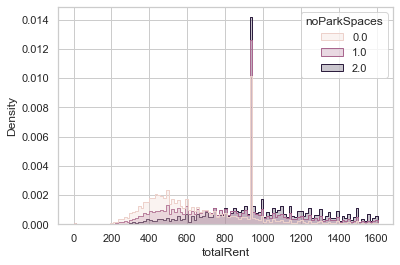

In [53]:

sns.histplot(
    tidy_housing_cleaned , x="totalRent", hue="noParkSpaces", element="step",
    stat="density", common_norm=False,
)

<AxesSubplot:xlabel='totalRent', ylabel='Count'>

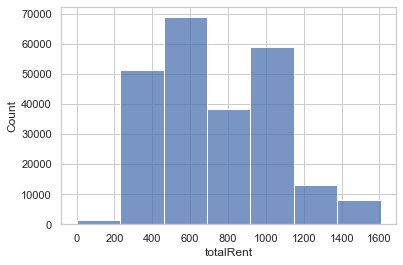

In [54]:
sns.histplot(tidy_housing_cleaned , x="totalRent", bins=7)

We have two big columns  of the rates would  comprised between 600-800€ and 1000-1200€

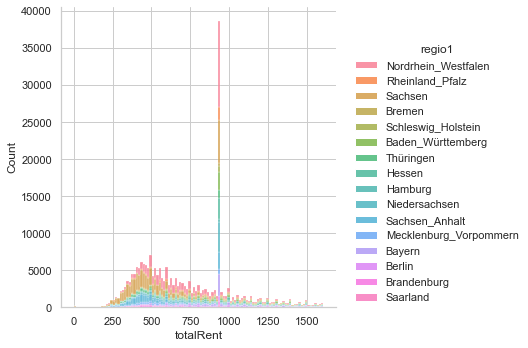

In [55]:
sns.displot(data=tidy_housing_cleaned , x="totalRent", hue="regio1", multiple="stack")
#how can I cap the count to 10000 so the graphic is seen better? 

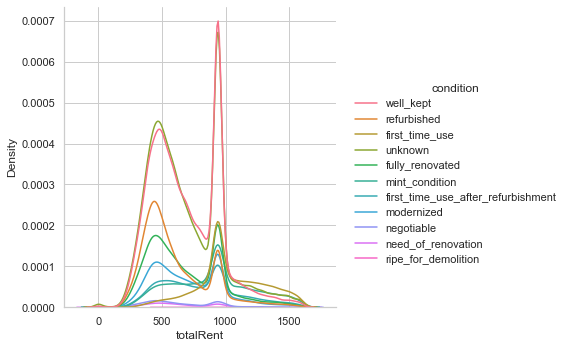

In [56]:
sns.displot(data=tidy_housing_cleaned , x="totalRent", hue="condition", kind="kde")

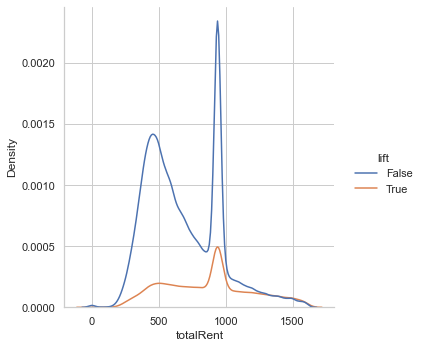

In [57]:
#Does having a lift influence heavily the price per month?
sns.displot(data=tidy_housing_cleaned , x="totalRent", hue="lift", kind="kde")

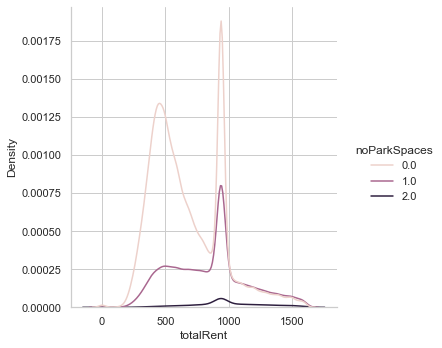

In [58]:
sns.displot(data=tidy_housing_cleaned , x="totalRent", hue="noParkSpaces", kind="kde")

In [59]:
#Variance, Standard Deviation and mean for clean tidy dataset
rent_variance = np.var(tidy_housing_cleaned.totalRent)
rent_std = np.std(tidy_housing_cleaned.totalRent)
print(rent_variance,rent_std,tidy_housing_cleaned.totalRent.mean())


88618.93280458867 297.68932262442445 725.1545617122844


In [60]:
#let's check now for our  dataset with the Nans removed. A larger variance means the data is more spread out and values tend to be far away rom the mean. A variance of 0 means all values in the dataset are the same.
rent_variance_ohne_nan = np.var(housing_ohne_nan.totalRent)
rent_std_ohne_nan = np.std(housing_ohne_nan.totalRent)
print(rent_variance_ohne_nan, rent_std_ohne_nan,housing_ohne_nan.totalRent.mean())

306565.08025314985 553.6831948444434 940.2456493506493


(array([35693., 73122., 40402., 62638., 14797.,  9777.]),
 array([ 200.        ,  416.66666667,  633.33333333,  850.        ,
        1066.66666667, 1283.33333333, 1500.        ]),
 <BarContainer object of 6 artists>)

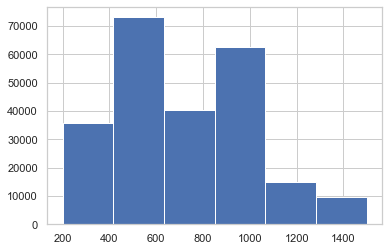

In [61]:
#let's plot an Histogram using Matplotlib Function , it appears to have two distinct peak like a Bimodal Dataset b 
data_array = np.array(tidy_housing_cleaned.totalRent)
plt.hist(data_array, range = (200,1500), bins = 6)

In [62]:
#the mean of the variable is equal to the proportion of 1's or True's. Meanwhile, the sm of the variable is equal to the frequency of 1's or True's
bi_newly_const = np.array(tidy_housing_cleaned.newlyConst)
print(np.mean(bi_newly_const),np.sum(bi_newly_const))



0.06793897586894325 16290


In [63]:
bi_newly_balcony = np.array(housing_ohne_nan.balcony)
print(np.mean(bi_newly_const),np.sum(bi_newly_balcony))

0.06793897586894325 111


In [64]:
bi_lift = np.array(tidy_housing_cleaned.lift)
print(np.mean(bi_lift),np.sum(bi_lift))

0.2111655141925313 50632


In [65]:
#19% 
bi_garden = np.array(tidy_housing_cleaned.garden)
print(np.mean(bi_garden  ),np.sum(bi_garden))

0.18990382610291356 45534


In [66]:
# Get the housing count by energy source 
firing_counts = tidy_housing_cleaned['firingTypes'].value_counts()
print(firing_counts)


gas                                         100042
unknown                                      50361
district_heating                             43894
oil                                          16077
natural_gas_light                             9108
                                             ...  
geothermal:solar_heating:pellet_heating          1
solar_heating:gas:oil:coal                       1
gas:oil:district_heating                         1
gas:combined_heat_and_power_fossil_fuels         1
solar_heating:oil:wood                           1
Name: firingTypes, Length: 120, dtype: int64


In [67]:
# Get the most common energy source 
most_firing = firing_counts.index[0]
most_firing

'gas'

In [68]:
#Ordinal Categorical Variables
# We will work it with the raw dataset where this column hasn't been dropped 
print(list(housing['baseRentRange'].unique()))
#make a list to indicate the desired order 
correct_order = [1,2,3,4,5,6,7,8,9]
correct_order_lv = [1,2,3,4,5,6,7]
housing['baseRentRange']= pd.Categorical(housing['baseRentRange'],correct_order, ordered=True)
housing['livingSpaceRange'] = pd.Categorical(housing['livingSpaceRange'],correct_order_lv, ordered=True)

[4, 5, 6, 2, 3, 1, 7, 8, 9]


In [69]:
print(housing['baseRentRange'])

0         4
1         5
2         6
3         2
4         5
         ..
268845    6
268846    6
268847    5
268848    6
268849    6
Name: baseRentRange, Length: 268850, dtype: category
Categories (9, int64): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]


In [70]:
print(housing['livingSpaceRange'].unique())

[4, 2, 3, 1, 6, 7, 5]
Categories (7, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7]


In [71]:
median_index_base_rent = np.median(housing['baseRentRange'].cat.codes)
print(median_index_base_rent)

2.0


In [72]:
median_index_living_space = np.median(housing['livingSpaceRange'].cat.codes)
print(median_index_living_space)

2.0


In [73]:
median_category = correct_order[int(median_index_base_rent)]
print(median_category)

3


In [74]:
median_category_lv = correct_order_lv[int(median_index_living_space)]
print(median_category_lv)

3


In [75]:
#Spread

tenth_perc_ind_rent = np.percentile(housing['baseRentRange'].cat.codes,10)
tenth_perc_cat_rent = correct_order[int(tenth_perc_ind_rent)]
nintieth_perc_ind_rent = np.percentile(housing['baseRentRange'].cat.codes,90)
nintieth_perc_cat_rent = correct_order[int(nintieth_perc_ind_rent)]

print(tenth_perc_cat_rent,nintieth_perc_cat_rent)

#At least 80% of the Base Rent for properties are within the pricing range 1 to 7 

1 7


In [76]:
#Table of Proportions for categorical variable 
tidy_housing_cleaned['firingTypes'].value_counts()/len(tidy_housing_cleaned['firingTypes'])

gas                                         0.417235
unknown                                     0.210035
district_heating                            0.183064
oil                                         0.067051
natural_gas_light                           0.037986
                                              ...   
geothermal:solar_heating:pellet_heating     0.000004
solar_heating:gas:oil:coal                  0.000004
gas:oil:district_heating                    0.000004
gas:combined_heat_and_power_fossil_fuels    0.000004
solar_heating:oil:wood                      0.000004
Name: firingTypes, Length: 120, dtype: float64

In [77]:
housing['telekomTvOffer'].value_counts(normalize=True).head()

ONE_YEAR_FREE    0.963599
NONE             0.020984
ON_DEMAND        0.015417
Name: telekomTvOffer, dtype: float64

In [78]:
tidy_housing_cleaned['balcony'].value_counts(normalize=True).head()

True     0.596578
False    0.403422
Name: balcony, dtype: float64

In [79]:
housing_ohne_nan['balcony'].value_counts(normalize=True).head()

True     0.720779
False    0.279221
Name: balcony, dtype: float64

In [80]:
housing['balcony'].value_counts(dropna= False, normalize=True).head()

True     0.616455
False    0.383545
Name: balcony, dtype: float64

In [81]:
housing['firingTypes'].value_counts(dropna= True, normalize=True).head()

gas                  0.523390
district_heating     0.233092
oil                  0.085598
natural_gas_light    0.047573
electricity          0.022833
Name: firingTypes, dtype: float64

In [82]:
housing['firingTypes'].value_counts(dropna= False, normalize=True).head()

gas                  0.412494
NaN                  0.211880
district_heating     0.183705
oil                  0.067461
natural_gas_light    0.037493
Name: firingTypes, dtype: float64

In [83]:
#Binary Categorial Variables 
print(np.mean(tidy_housing_cleaned['cellar']),np.sum(tidy_housing_cleaned['cellar']))


0.6412621885608949 153758


In [84]:
print(tidy_housing_cleaned == 'well_kept')

        regio1  serviceCharge  heatingType  newlyConst  balcony  totalRent  \
0        False          False        False       False    False      False   
1        False          False        False       False    False      False   
2        False          False        False       False    False      False   
3        False          False        False       False    False      False   
4        False          False        False       False    False      False   
...        ...            ...          ...         ...      ...        ...   
268845   False          False        False       False    False      False   
268846   False          False        False       False    False      False   
268847   False          False        False       False    False      False   
268848   False          False        False       False    False      False   
268849   False          False        False       False    False      False   

        yearConstructed  noParkSpaces  firingTypes  hasKitchen 

In [85]:
(tidy_housing_cleaned.condition == 'well_kept').sum()

61711

In [86]:
(tidy_housing_cleaned.condition == 'well_kept').mean()

0.2573715248525695

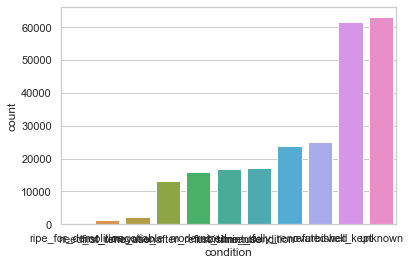

In [87]:
#Bar Chart Nominal Data Ordering

ax= sns.countplot(x=tidy_housing_cleaned["condition"], order=tidy_housing_cleaned["condition"].value_counts(ascending=True).index)

/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='baseRentRange', ylabel='count'>

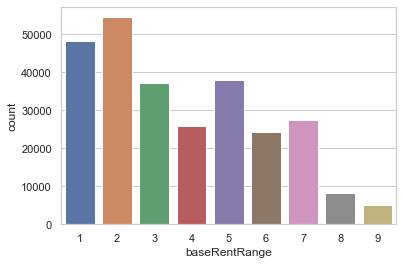

In [88]:
#Check and Compare **** 



#sns.countplot(tidy_housing_cleaned["baseRentRange"], order=[1,2,3,4,5,6,7,8,9])
#sns.countplot(data = housing["baseRentRange"], order=[1,2,3,4,5,6,7,8,9])
sns.countplot(housing["baseRentRange"])

In [89]:
from sklearn.preprocessing import MinMaxScaler

# Min Max Normalization
scaler = MinMaxScaler()
standard_scale_test= housing_ohne_nan[['totalRent','yearConstructed','livingSpace']]
standard_scale_test= standard_scale_test.astype({"totalRent":'int', "yearConstructed":'int', "livingSpace":'int'}) 
normalized_data = scaler.fit_transform(standard_scale_test)
x_data= housing[['totalRent','yearConstructed','livingSpace']]

<h3> Standarization Test </h3>

In [90]:
x_Data = x_data.apply(lambda x : (x- x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))

In [91]:
x_Data

,totalRent,yearConstructed,livingSpace
0,0.000053,0.885321,0.000774
1,NaN,0.799083,0.000801
2,0.000083,0.934862,0.000754
3,NaN,0.884404,0.000523
4,0.000057,0.871560,0.000765
...,...,...,...
268845,0.000058,0.932110,0.000810
268846,0.000073,0.901835,0.001035
268847,0.000059,0.885321,0.000855
268848,0.000064,0.934862,0.000630


In [92]:
normalized_data

array([[0.41278296, 0.98550725, 0.34862385],
       [0.27962716, 0.63043478, 0.18348624],
       [0.32836218, 0.98550725, 0.22018349],
       [0.2849534 , 0.34057971, 0.42201835],
       [0.2412783 , 0.98550725, 0.0733945 ],
       [0.12782956, 0.84057971, 0.16513761],
       [0.59014647, 0.76811594, 0.51834862],
       [0.14780293, 0.63043478, 0.19266055],
       [0.07509987, 0.78985507, 0.        ],
       [0.1677763 , 0.67391304, 0.13302752],
       [0.29267643, 0.99275362, 0.21559633],
       [0.15552597, 0.79710145, 0.24311927],
       [0.29640479, 0.20289855, 0.30275229],
       [0.0942743 , 0.03623188, 0.09633028],
       [0.15845539, 0.82608696, 0.20642202],
       [0.12516644, 0.22463768, 0.1146789 ],
       [0.54860186, 0.64492754, 0.40825688],
       [0.18641811, 0.73913043, 0.29816514],
       [0.20905459, 0.55072464, 0.20642202],
       [0.1150466 , 0.86956522, 0.07798165],
       [0.17390146, 0.89855072, 0.19724771],
       [0.10652463, 0.76086957, 0.07798165],
       [0.

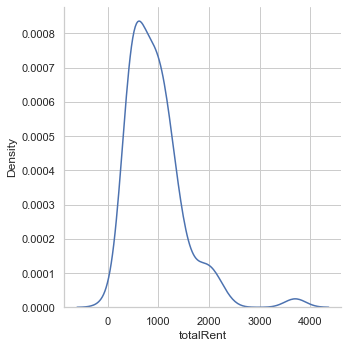

In [93]:
# Standardization 

sns.displot(data=standard_scale_test, x="totalRent", kind="kde")

<AxesSubplot:xlabel='yearConstructed', ylabel='totalRent'>

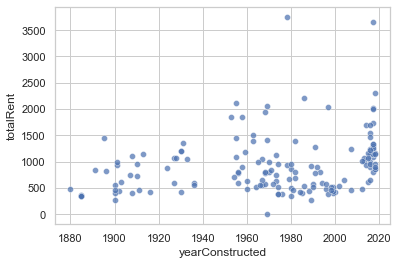

In [94]:
#  STANDARIZE TEST PENDING 

sns.scatterplot(data=standard_scale_test, x="yearConstructed", y="totalRent",alpha=0.72)

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(standard_scale_test)

<h3> Binning Data </h3>

In [96]:
housing.heatingCosts.describe()

count    85518.000000
mean        76.990866
std        147.716278
min          0.000000
25%         54.000000
50%         70.000000
75%         90.000000
max      12613.000000
Name: heatingCosts, dtype: float64

In [97]:
bins = [55, 70, 90, 120,150 ]

In [98]:
housing_b_test = tidy_housing_cleaned

In [99]:
heating_labels = ['less than 55 €', 'up to 70€', 'up to 90€', 'over 120€']

In [100]:
housing_b_test['binned_heating'] = pd.cut(housing_b_test['heatingCosts'], bins, labels= heating_labels)


In [101]:
print(housing_b_test[['binned_heating','heatingCosts']].head())

  binned_heating  heatingCosts
0      up to 70€         86.00
1      up to 70€         86.00
2      up to 70€         86.00
3      up to 70€         87.23
4      up to 70€         86.00


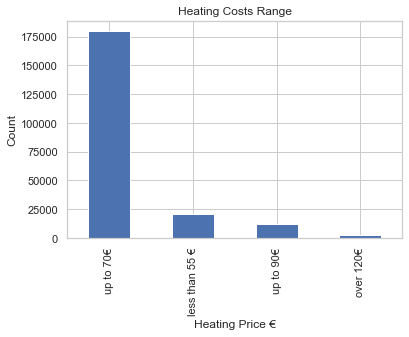

In [102]:
housing_b_test['binned_heating'].value_counts().plot(kind='bar')
plt.title('Heating Costs Range')
plt.xlabel('Heating Price €')
plt.ylabel('Count')
plt.show()

<h3> * Combining Categories </h3>

In [103]:
#let’s import our data and see the counts for each heating category
heats = tidy_housing_cleaned['heatingType'].value_counts()
heats

central_heating                   117532
unknown                            40212
district_heating                   22395
gas_heating                        17724
self_contained_central_heating     17429
floor_heating                      12847
oil_heating                         4413
heat_pump                           2227
combined_heat_and_power_plant       1616
night_storage_heater                1303
electric_heating                     837
wood_pellet_heating                  791
stove_heating                        319
solar_heating                        129
Name: heatingType, dtype: int64

([<matplotlib.patches.Wedge at 0x7f8878bca880>,
 [Text(0.03393612081120162, 1.099476393427475, ''),
  Text(-0.9831257050460125, -0.4934205590343608, ''),
  Text(-0.3096342603885906, -1.0555219679351115, ''),
  Text(0.2618034722898436, -1.068390818893995, ''),
  Text(0.7093920068873645, -0.8406919653263718, ''),
  Text(0.9791178893319127, -0.5013263994547072, ''),
  Text(1.066596409651804, -0.26902062916787867, ''),
  Text(1.0859375829540918, -0.17532702566297334, ''),
  Text(1.0933856285064099, -0.12044860885723445, ''),
  Text(1.097191573329957, -0.07855349396260765, ''),
  Text(1.0989625733935124, -0.04776256149233577, ''),
  Text(1.0997312977010434, -0.024311989979828037, ''),
  Text(1.0999685652741331, -0.008315973109944055, ''),
  Text(1.0999984287474514, -0.0018592345570822982, '')])

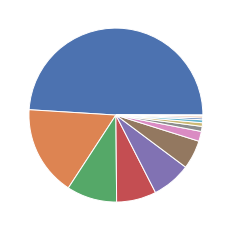

In [104]:
plt.pie(heats)

In [105]:
heating_mask = tidy_housing_cleaned.isin(heats[heats < 10000].index)

In [106]:
tidy_housing_cleaned['heatingType'].replace(heats[heats<10000].index,"Other",inplace=True)

In [107]:
#let’s import our data and see the counts for each heating category
heats = tidy_housing_cleaned['heatingType'].value_counts()
heats

central_heating                   117532
unknown                            40212
district_heating                   22395
gas_heating                        17724
self_contained_central_heating     17429
floor_heating                      12847
Other                              11635
Name: heatingType, dtype: int64

([<matplotlib.patches.Wedge at 0x7f888f2e2220>,
 [Text(0.03393612081120162, 1.099476393427475, 'central_heating'),
  Text(-0.9831257050460125, -0.4934205590343608, 'unknown'),
  Text(-0.3096342603885906, -1.0555219679351115, 'district_heating'),
  Text(0.2618034722898436, -1.068390818893995, 'gas_heating'),
  Text(0.7093920068873645, -0.8406919653263718, 'self_contained_central_heating'),
  Text(0.9791178893319127, -0.5013263994547072, 'floor_heating'),
  Text(1.0872429598062165, -0.16704115167173042, 'Other')])

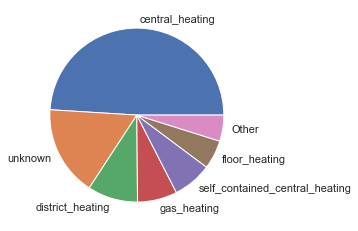

In [108]:
plt.pie(heats,labels=['central_heating','unknown','district_heating','gas_heating','self_contained_central_heating','floor_heating','Other'])

<h3> Log Transformation </h3>

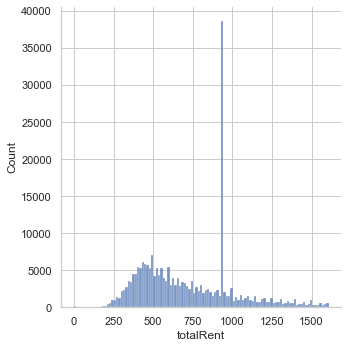

In [109]:
from sklearn.preprocessing import PowerTransformer
# log transform 
log_transform = PowerTransformer()
total_rent = tidy_housing_cleaned['totalRent']
oh_total_rent = housing_ohne_nan['totalRent']
sns.displot(total_rent)

In [110]:
#Let's check how the data is skewed
#Generally, if skewness is less than -1 or greater than 1, the distribution is highly skewed.
print(total_rent.skew(),oh_total_rent.skew())

0.5658047781646593 2.0119301980834456


In [111]:
# apply log transformation
log_rent_prices = np.log(total_rent)
oh_log_rent_prices = np.log(oh_total_rent)
print(oh_log_rent_prices.skew())
# nan skew for oh_log_rent prices? *****

nan


/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [112]:
housing_ohne_nan_num= housing_ohne_nan[['totalRent','livingSpace']]

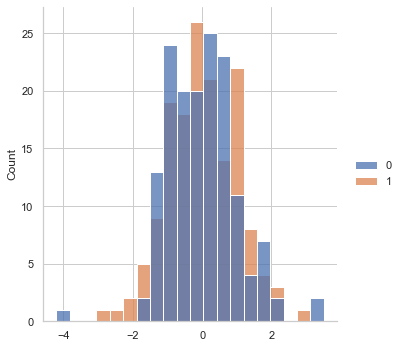

In [113]:
from sklearn.preprocessing import PowerTransformer
# log transform 
#and log transfor displot for totalRent and LivingSpace in the housing with out nan dataset 
log_transform = PowerTransformer()
sns.displot(log_transform.fit_transform(housing_ohne_nan_num))


In [114]:
#sns.displot(oh_log_rent_prices)

In [115]:
#sns.displot(log_home_prices)

In [116]:
housing.regio1.unique()

array(['Nordrhein_Westfalen', 'Rheinland_Pfalz', 'Sachsen', 'Bremen',
       'Schleswig_Holstein', 'Baden_Württemberg', 'Thüringen', 'Hessen',
       'Niedersachsen', 'Bayern', 'Hamburg', 'Sachsen_Anhalt',
       'Mecklenburg_Vorpommern', 'Berlin', 'Brandenburg', 'Saarland'],
      dtype=object)

In [117]:
#Quantitative and categorical variables

rent_nw = tidy_housing_cleaned.totalRent[tidy_housing_cleaned.regio1 == 'Nordrhein_Westfalen']
rent_sa = tidy_housing_cleaned.totalRent[tidy_housing_cleaned.regio1 == 'Sachsen']

In [118]:
mean_nw = np.mean(rent_nw)
mean_sa = np.mean(rent_sa)
#print the mean of Nordrhein Westfalen, the mean of Sachsen, and the difference between the two
print(mean_nw, mean_sa, (mean_nw - mean_sa))

745.5598459705409 573.4759412162286 172.08390475431224


In [119]:
median_nw = np.median(rent_nw)
median_sa = np.median(rent_sa)
#print the mean of Nordrhein Westfalen, the mean of Sachsen, and the difference between the two
print(median_nw, median_sa, (median_nw - median_sa))

710.0 490.0 220.0


<AxesSubplot:xlabel='totalRent', ylabel='regio1'>

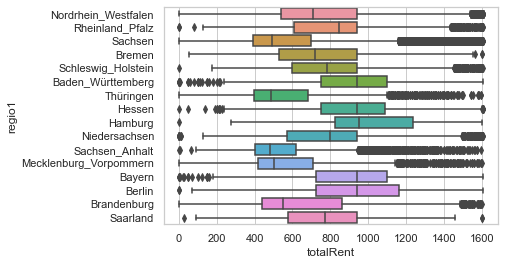

In [120]:
# let's take a look at the spread with a Side-by-side box to better see if this difference is considered small or large 
sns.boxplot(data = tidy_housing_cleaned, x = 'totalRent', y= 'regio1')
# the boxes barely overlap,  the middle 50% of rent are different between the Bundesländer 

<p> there are however some Bundesländer where the 50% middle are similiar, like Bayern and Berlin, Sachsen Anhalt and Mecklenburg Vorpommern and Hessen and Hamburg </p>

<AxesSubplot:xlabel='totalRent', ylabel='regio1'>

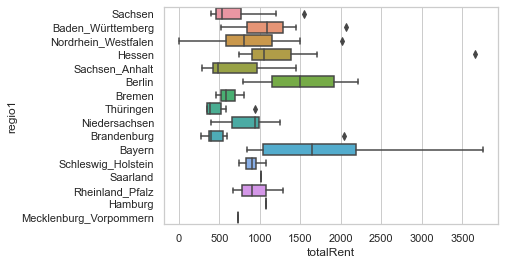

In [121]:
#Let's check the graph for the data without missing values dataset
# ** check the outliers in tidy housing nan 
sns.boxplot(data = tidy_housing_nan, x = 'totalRent', y= 'regio1')

[Text(0, 0, 'district_heating'),
 Text(1, 0, 'central_heating'),
 Text(2, 0, 'gas_heating'),
 Text(3, 0, 'floor_heating'),
 Text(4, 0, 'oil_heating'),
 Text(5, 0, 'self_contained_central_heating'),
 Text(6, 0, 'combined_heat_and_power_plant'),
 Text(7, 0, 'night_storage_heater'),
 Text(8, 0, 'heat_pump')]

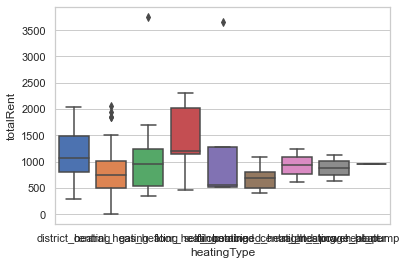

In [122]:
# quantitative variable and non binary variable
ax=sns.boxplot(data=housing_ohne_nan, x='heatingType', y= 'totalRent',saturation=1)
ax.get_xticklabels()



Text(0, 0.5, 'Area (Square meter)')

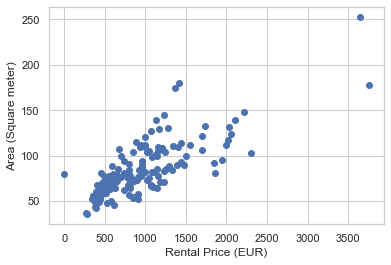

In [123]:
#Associations: Two Quantitative variables
# still two outliers ** 
plt.scatter(x=housing_ohne_nan.totalRent, y= housing_ohne_nan.livingSpace)
plt.xlabel('Rental Price (EUR)')
plt.ylabel('Area (Square meter)')


In [124]:
#covariance: a positive covariance indicates that a larger value of one variable is associated with a larger value of the other
cov_mat_price_m = np.cov(housing_ohne_nan.totalRent,housing_ohne_nan.livingSpace)
print(cov_mat_price_m)

[[308568.77358814  13299.33829401]
 [ 13299.33829401    936.97524699]]


In [125]:
#correlation is a scaled form of covariance, highly associated variables with a positive linear relationship will have a correlation close to 1.
from scipy.stats import pearsonr
corr_price_m, p = pearsonr(housing_ohne_nan.totalRent,housing_ohne_nan.livingSpace)
print(corr_price_m)

0.7821498874433068


<p> Generally, a correlation larger tha about .3 indicates a linear association. A correlation greater than about .6 suggests a strong linear association </p>

In [126]:
# two categorical variables associations

In [127]:
# contingency tables 
firing_condition_freq = pd.crosstab(housing_ohne_nan.firingTypes,housing_ohne_nan.condition)
print(firing_condition_freq)

condition                     first_time_use  \
firingTypes                                    
district_heating                           2   
electricity                                1   
environmental_thermal_energy               0   
gas                                        6   
geothermal                                 1   
liquid_gas                                 0   
natural_gas_heavy                          0   
natural_gas_light                          1   
oil                                        1   
pellet_heating                             1   
solar_heating                              0   
steam_district_heating                     0   

condition                     first_time_use_after_refurbishment  \
firingTypes                                                        
district_heating                                               5   
electricity                                                    2   
environmental_thermal_energy                           

In [128]:
#which Bundesland would be the most pet friendly one? 
bundesland_pets_freq = pd.crosstab(housing.regio1, housing.petsAllowed)
print(bundesland_pets_freq)

petsAllowed             negotiable     no   yes
regio1                                         
Baden_Württemberg             3045   7517   412
Bayern                        4602   8185   569
Berlin                        4027   1249   292
Brandenburg                   2884    685   411
Bremen                        1047    495    66
Hamburg                        873    760   131
Hessen                        4933   5566   522
Mecklenburg_Vorpommern        2467    603   236
Niedersachsen                 5109   4105   467
Nordrhein_Westfalen          20918  13960  1925
Rheinland_Pfalz               2241   2916   251
Saarland                       297    404    62
Sachsen                      25743   2648  2994
Sachsen_Anhalt                8586   1051  1391
Schleswig_Holstein            2276   1186   158
Thüringen                     2922    661   429


<p> Sachsen would be the most friendly Bundesland followed by Sachsen Anhalt. Also Thüringen and Brandeburg goes in the pets friendly list. It seems also Nordrhein Westfalen ist pretty open to negotiatiate this subject <p> 

In [129]:
#Contingency Tables: Proportions
bundesland_pets_prop = (bundesland_pets_freq/len(housing))
print(bundesland_pets_prop)

petsAllowed             negotiable        no       yes
regio1                                                
Baden_Württemberg         0.011326  0.027960  0.001532
Bayern                    0.017117  0.030444  0.002116
Berlin                    0.014979  0.004646  0.001086
Brandenburg               0.010727  0.002548  0.001529
Bremen                    0.003894  0.001841  0.000245
Hamburg                   0.003247  0.002827  0.000487
Hessen                    0.018349  0.020703  0.001942
Mecklenburg_Vorpommern    0.009176  0.002243  0.000878
Niedersachsen             0.019003  0.015269  0.001737
Nordrhein_Westfalen       0.077805  0.051925  0.007160
Rheinland_Pfalz           0.008336  0.010846  0.000934
Saarland                  0.001105  0.001503  0.000231
Sachsen                   0.095752  0.009849  0.011136
Sachsen_Anhalt            0.031936  0.003909  0.005174
Schleswig_Holstein        0.008466  0.004411  0.000588
Thüringen                 0.010869  0.002459  0.001596


In [130]:
#Marginal Proportions 

pet_marginals = bundesland_pets_prop.sum(axis=0)
print(pet_marginals)

petsAllowed
negotiable    0.342087
no            0.193383
yes           0.038371
dtype: float64


In [131]:
firing_condition_prop = firing_condition_freq/len(housing_ohne_nan)
print(firing_condition_prop)

condition                     first_time_use  \
firingTypes                                    
district_heating                    0.012987   
electricity                         0.006494   
environmental_thermal_energy        0.000000   
gas                                 0.038961   
geothermal                          0.006494   
liquid_gas                          0.000000   
natural_gas_heavy                   0.000000   
natural_gas_light                   0.006494   
oil                                 0.006494   
pellet_heating                      0.006494   
solar_heating                       0.000000   
steam_district_heating              0.000000   

condition                     first_time_use_after_refurbishment  \
firingTypes                                                        
district_heating                                        0.032468   
electricity                                             0.012987   
environmental_thermal_energy                           

In [132]:
firing_marginals = firing_condition_prop.sum(axis = 0)
print(firing_marginals)

condition
first_time_use                        0.084416
first_time_use_after_refurbishment    0.129870
fully_renovated                       0.110390
mint_condition                        0.253247
modernized                            0.064935
need_of_renovation                    0.006494
refurbished                           0.116883
well_kept                             0.233766
dtype: float64


In [139]:
# contingency table of expected proportions if there were no association
# This table tells us that if there were no association between the Bundesland and having a pet is negotiable, possible or not possible
# we would expect for example for 6542 properties for Baden_Württemberg to allow to negotiate if there could be a pet or not   
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(bundesland_pets_freq)
print(np.round(expected))


[[ 6542.  3698.   734.]
 [ 7962.  4501.   893.]
 [ 3319.  1876.   372.]
 [ 2373.  1341.   266.]
 [  959.   542.   108.]
 [ 1052.   594.   118.]
 [ 6570.  3714.   737.]
 [ 1971.  1114.   221.]
 [ 5771.  3262.   647.]
 [21940. 12403.  2461.]
 [ 3224.  1822.   362.]
 [  455.   257.    51.]
 [18710. 10577.  2099.]
 [ 6574.  3716.   737.]
 [ 2158.  1220.   242.]
 [ 2392.  1352.   268.]]


<p> Now that we have the expected contingency table If there is no association, we can compare it to our observed contingency table </p>

<p> For Baden Wüttenberg there is a big difference 6542 compared to 3045 as there expected and observed values differ we could have some additional certainty that the variables are associated </p>

In [ ]:
#To see how different these two tables are let's calculate the Chi-Square value 

In [141]:
# The more associated two variables are, the larger the Chi-Square statistic will be
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(bundesland_pets_freq)
print(chi2)

27767.52702434674


<h3> Hypothesis Testing </h3>

In [ ]:
# How far from the population mean could this sample mean reallistically be? 

In [ ]:
# Is the rent mean significally higher in one Bundesland? 

<p> *<b>Null Hypothesis: </b> The Mean for x Bundesland is. If this hypothesis is true, x Bundesland has a higher rent average 
<br>
    *<b> Alternative Hypothesis </b>: The mean for x Bundesland is different from the national mean. 
</p>

In [163]:
housing.typeOfFlat.dtypes

dtype('O')

In [159]:
#small test to convert a bool into a string 
lift_string = housing.lift.copy() #create a copy of pandas DataFrame 
lift_string['lift']= housing['lift'].map({True: 'True', False:'False'}) #Replace boolean by string
lift_string.head()    #print updated pandas DataFrame 

0    False
1    False
2     True
3    False
4    False
Name: lift, dtype: object

In [165]:
housing.typeOfFlat.unique()

array(['ground_floor', 'apartment', 'other', nan, 'roof_storey',
       'raised_ground_floor', 'terraced_flat', 'half_basement',
       'maisonette', 'penthouse', 'loft'], dtype=object)

In [177]:
apartment = housing_ohne_nan.totalRent[housing_ohne_nan.typeOfFlat =='apartment']
maisonette = housing_ohne_nan.totalRent[housing_ohne_nan.typeOfFlat =='maisonette']

In [178]:
# Two-Sample T-Test 
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(apartment, maisonette)
print(pval)

6.097269229575988e-08


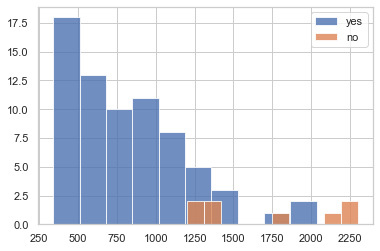

In [180]:
plt.hist(apartment,alpha=.8,label='yes')
plt.hist (maisonette, alpha=.8,label = 'no')
plt.legend()
plt.show()

In [133]:
# Unique values.
columns = ['regio1','typeOfFlat','heatingType','condition','regio2','regio3']

for column in columns:
    print('-'*50)
    print('Column name: {c}'.format(c = column.upper()))
    print(housing[column].value_counts())

--------------------------------------------------
Column name: REGIO1
Nordrhein_Westfalen       62863
Sachsen                   58154
Bayern                    21609
Sachsen_Anhalt            20124
Hessen                    17845
Niedersachsen             16593
Baden_Württemberg         16091
Berlin                    10406
Thüringen                  8388
Rheinland_Pfalz            8368
Brandenburg                6954
Schleswig_Holstein         6668
Mecklenburg_Vorpommern     6634
Hamburg                    3759
Bremen                     2965
Saarland                   1429
Name: regio1, dtype: int64
--------------------------------------------------
Column name: TYPEOFFLAT
apartment              131522
roof_storey             34787
ground_floor            31538
other                    9519
maisonette               9319
raised_ground_floor      5628
penthouse                3568
terraced_flat            3385
half_basement            2013
loft                      957
Name: typeOfFla

In [134]:
property_type = housing.groupby('typeOfFlat').date.count().reset_index()
property_type_asc = property_type.sort_values(by=['date'], ascending = False).reset_index(drop=True)
property_agr= property_type_asc.sort_values(by=['date'], ascending = False).reset_index(drop= True)
property_agr= property_agr[:4]
other_prop= property_type_asc[3:10].reset_index()
other_prop.drop(['index'],axis=1,inplace=True)

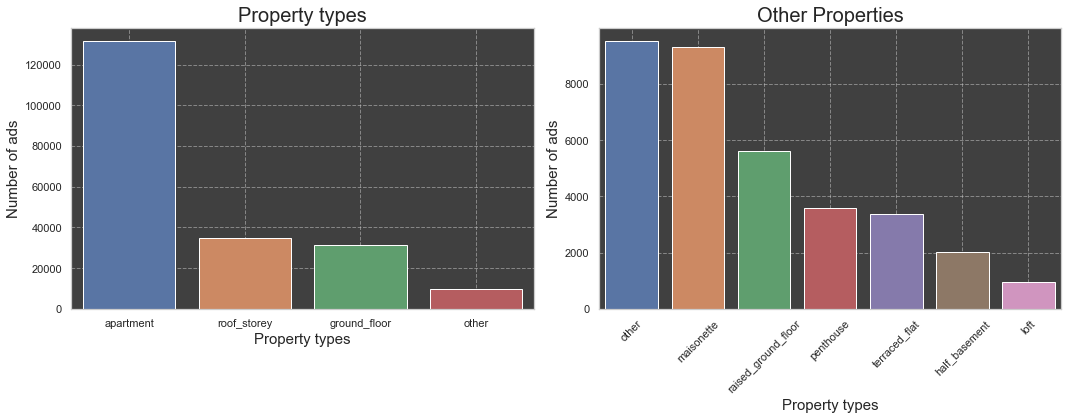

In [102]:
fig = plt.figure(figsize = (15,6))
ax1= fig.add_subplot(121)
ax1= sns.barplot(data = property_agr,x='typeOfFlat',y='date')
ax1.set_title('Property types', fontsize= 20)
ax1.set_xlabel('Property types', fontsize =15)
ax1.set_ylabel('Number of ads', fontsize = 15)
ax1.set_facecolor('#404040')
ax1.grid(linestyle='--', alpha = 0.5)

ax2= fig.add_subplot(122)
ax2=sns.barplot(data =other_prop,x='typeOfFlat',y='date')
plt.xticks(rotation=45)
ax2.set_title('Other Properties', fontsize = 20)
ax2.set_xlabel('Property types', fontsize =15)
ax2.set_ylabel('Number of ads', fontsize = 15)
ax2.set_facecolor('#404040')
ax2.grid(linestyle='--', alpha = 0.5)

plt.tight_layout()
plt.show()

<AxesSubplot:>

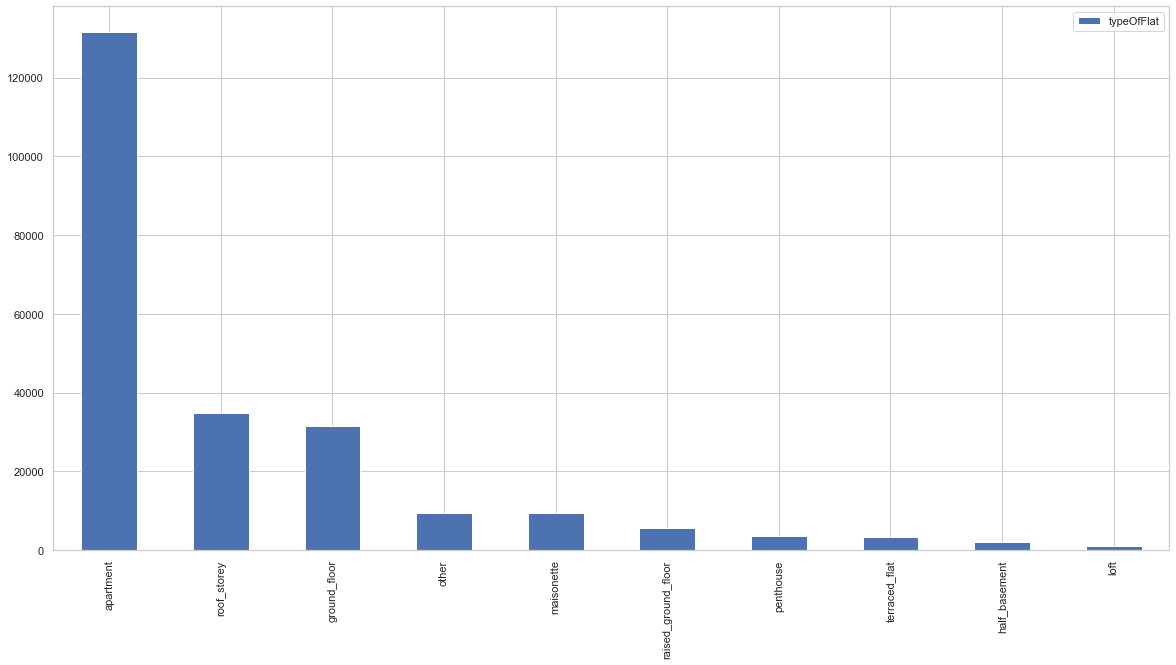

In [103]:
#Let's check the distribution of the typeOfFlat column
pd.DataFrame(housing_subset['typeOfFlat'].value_counts()).plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

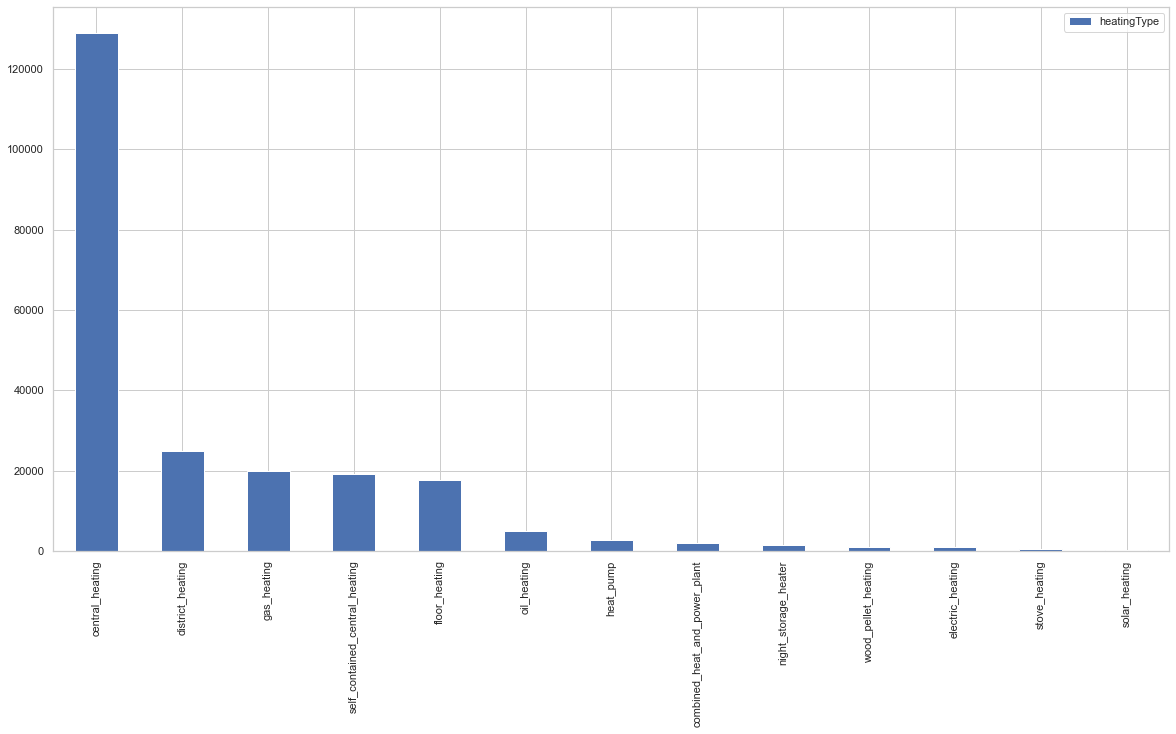

In [104]:
#Let's check the distribution of the heatingType column
pd.DataFrame(housing_subset['heatingType'].value_counts()).plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

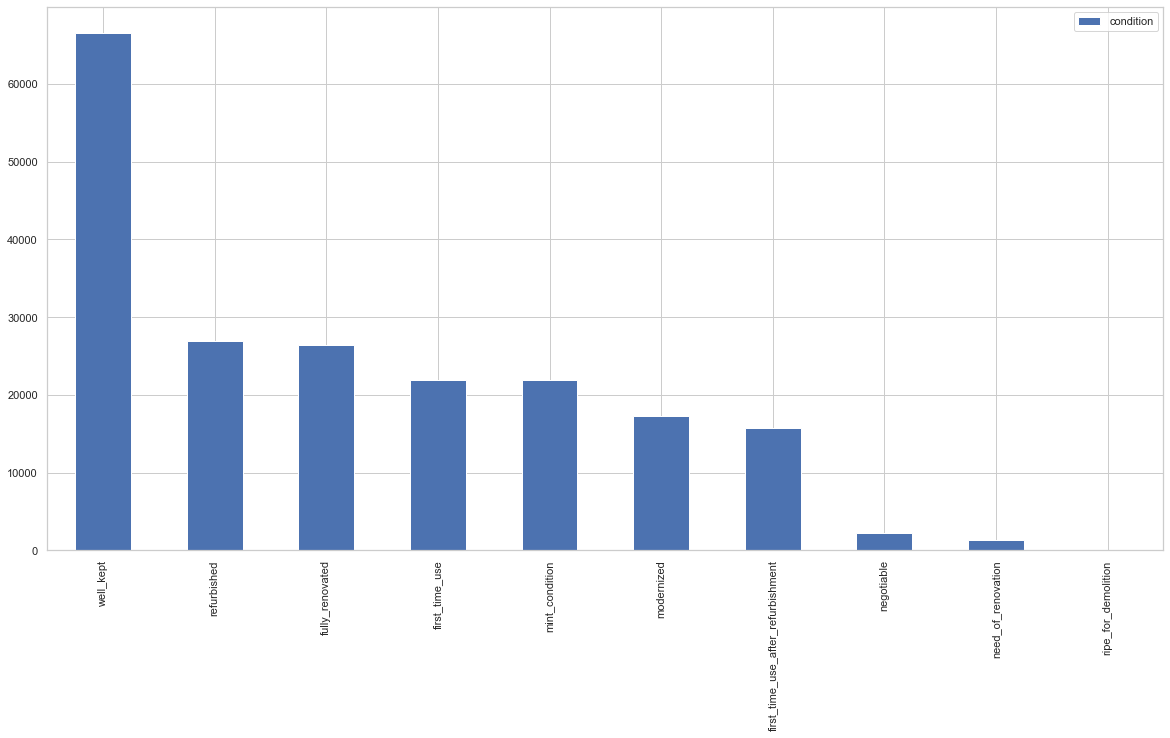

In [105]:
#Let's check the distribution of the condition column
pd.DataFrame(housing_subset['condition'].value_counts()).plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

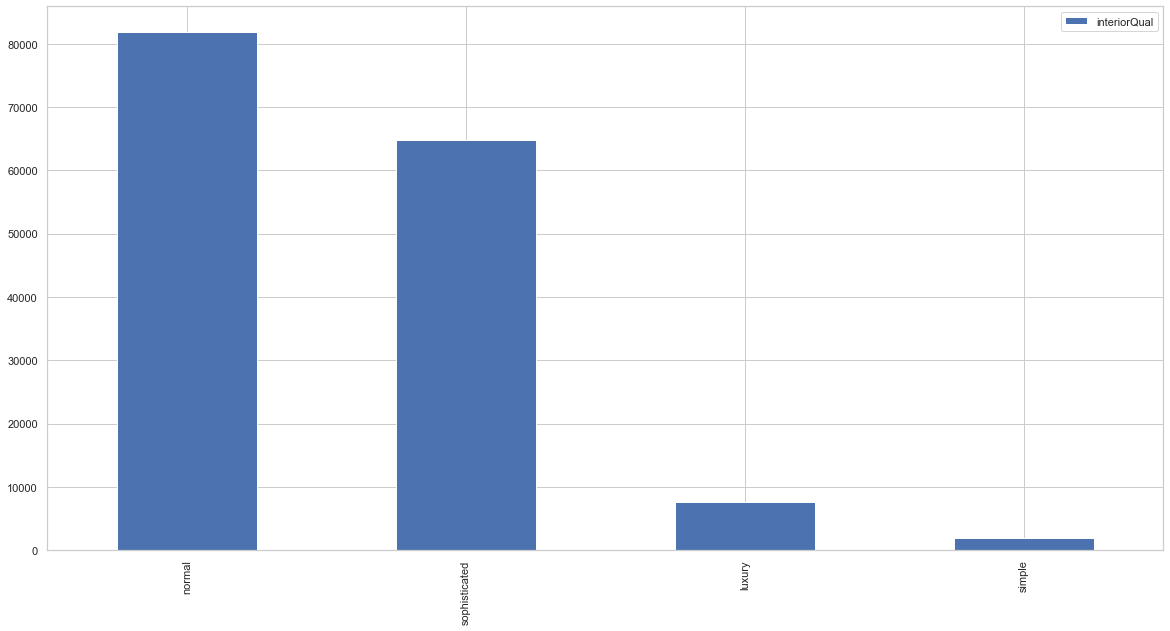

In [106]:
pd.DataFrame(housing_subset['interiorQual'].value_counts()).plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

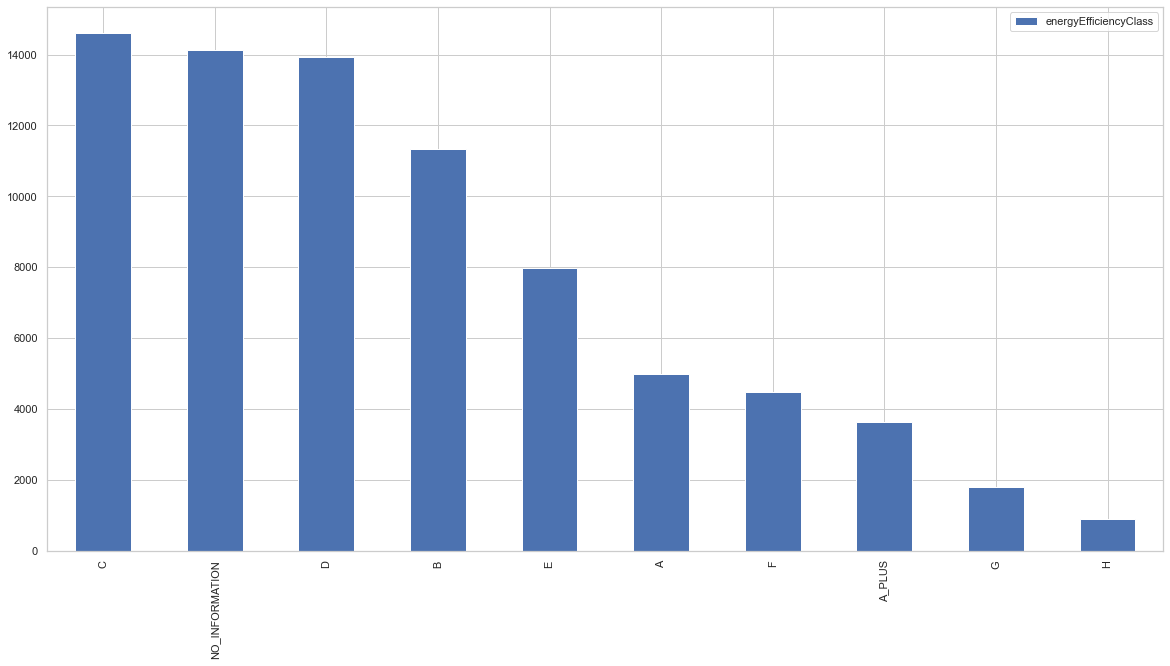

In [107]:
pd.DataFrame(housing['energyEfficiencyClass'].value_counts()).plot(kind='bar', figsize=(20,10))

In [108]:
#Let's explore a bit the binary columns

# have the NAAns and similar been taken out? only 50% have kitchen? 

housing_prop= housing[[ 'newlyConst', 'balcony',  'hasKitchen', 
       'cellar',  'lift',  'garden',]]
housing_prop.apply(pd.Series.value_counts)

,newlyConst,balcony,hasKitchen,cellar,lift,garden
False,247679,103116,176794,96615,205528,216093
True,21171,165734,92056,172235,63322,52757


In [109]:
#What are the possibilities for heatingType

housing_subset['heatingType'].value_counts()

central_heating                   128977
district_heating                   24808
gas_heating                        19955
self_contained_central_heating     19087
floor_heating                      17697
oil_heating                         5042
heat_pump                           2737
combined_heat_and_power_plant       1978
night_storage_heater                1341
wood_pellet_heating                  961
electric_heating                     901
stove_heating                        344
solar_heating                        166
Name: heatingType, dtype: int64

<h2> 4. Data Cleaning </h2>

In [90]:
housing_subset.isna().sum()

regio1                        0
serviceCharge              6909
heatingType               44856
newlyConst                    0
balcony                       0
totalRent                 40517
yearConstructed           57045
noParkSpaces             175798
firingTypes               56964
hasKitchen                    0
geo_bln                       0
cellar                        0
baseRent                      0
livingSpace                   0
condition                 68489
interiorQual             112665
petsAllowed              114573
lift                          0
typeOfFlat                36614
noRooms                       0
floor                     51309
numberOfFloors            97732
noRoomsRange                  0
garden                        0
heatingCosts             183332
energyEfficiencyClass    191063
lastRefurbish            188139
electricityBasePrice     222004
date                          0
dtype: int64

In [91]:
housing_subset[housing_subset['serviceCharge'].isna()]

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,typeOfFlat,noRooms,floor,numberOfFloors,noRoomsRange,garden,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,date
72,Sachsen,NaN,NaN,True,False,420.24,2017.0,NaN,district_heating,False,Sachsen,False,329.60,41.00,well_kept,NaN,NaN,False,ground_floor,2.0,1.0,4.0,2,False,NaN,NaN,NaN,90.76,Sep18
118,Bayern,NaN,NaN,True,True,1390.00,2018.0,1.0,district_heating,False,Bayern,False,1390.00,33.00,NaN,NaN,no,True,NaN,1.0,3.0,NaN,1,False,NaN,C,NaN,NaN,May19
176,Niedersachsen,NaN,central_heating,False,False,NaN,1994.0,1.0,oil,False,Niedersachsen,True,850.00,100.00,mint_condition,sophisticated,NaN,False,NaN,3.0,NaN,2.0,3,False,NaN,NaN,2019.0,NaN,May19
188,Nordrhein_Westfalen,NaN,floor_heating,False,False,720.00,NaN,1.0,pellet_heating,False,Nordrhein_Westfalen,True,720.00,96.00,well_kept,normal,NaN,False,other,3.0,1.0,2.0,3,True,NaN,NaN,NaN,90.76,Sep18
208,Niedersachsen,NaN,gas_heating,False,True,460.00,NaN,NaN,NaN,True,Niedersachsen,False,380.00,58.00,NaN,NaN,no,False,apartment,2.0,NaN,NaN,2,False,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268601,Sachsen,NaN,floor_heating,True,True,NaN,2020.0,1.0,gas,False,Sachsen,True,552.00,92.36,first_time_use_after_refurbishment,sophisticated,yes,True,raised_ground_floor,4.5,0.0,5.0,4,False,NaN,NaN,2020.0,NaN,May19
268620,Thüringen,NaN,NaN,False,True,320.00,NaN,NaN,NaN,True,Thüringen,False,320.00,24.00,NaN,NaN,NaN,False,apartment,1.0,1.0,1.0,1,False,NaN,NaN,NaN,NaN,Oct19
268696,Saarland,NaN,NaN,False,True,NaN,1988.0,NaN,district_heating,True,Saarland,False,580.00,60.00,NaN,NaN,no,False,NaN,2.0,NaN,NaN,2,False,NaN,E,NaN,NaN,May19
268711,Thüringen,NaN,NaN,False,True,280.00,1995.0,1.0,NaN,True,Thüringen,False,200.00,23.00,well_kept,normal,NaN,False,roof_storey,1.0,3.0,3.0,1,False,NaN,NaN,NaN,NaN,Oct19


In [92]:
housing_subset['serviceCharge'].value_counts()

150.00    14293
100.00    12995
200.00    11147
120.00    10650
130.00     7455
          ...  
83.79         1
83.71         1
138.19        1
110.65        1
111.61        1
Name: serviceCharge, Length: 12266, dtype: int64

In [93]:
housing_subset['serviceCharge'].describe()

count    261941.000000
mean        151.206113
std         308.295790
min           0.000000
25%          95.000000
50%         135.000000
75%         190.000000
max      146118.000000
Name: serviceCharge, dtype: float64

In [94]:
housing_subset['serviceCharge'].fillna(150, inplace =True)

/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [95]:
housing_subset.serviceCharge.isna().sum()


0

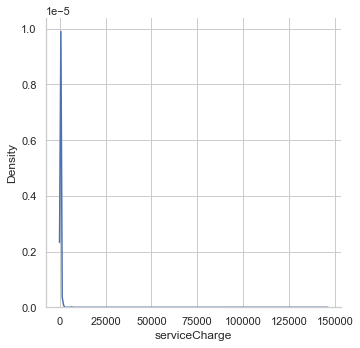

In [96]:
sns.displot(data=housing_subset, x="serviceCharge", kind="kde")

AttributeError: 'Rectangle' object has no property 'fit'

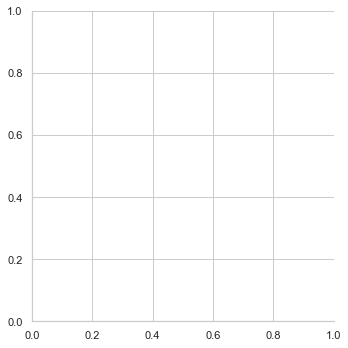

In [97]:
from scipy.stats import norm
ax = sns.displot(housing_subset.serviceCharge, fit=norm, kde=False)

In [98]:
housing.dropna(subset= ['totalRent','serviceCharge','lastRefurbish'])


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
12,Rheinland_Pfalz,270.0,oil_heating,NONE,NaN,False,False,4,2.77,2.4,920.00,1912.0,111251778,NaN,NaN,False,Rheinland_Pfalz,False,1.0,650.0,NaN,100.00,Südliche_Weinstraße_Kreis,mint_condition,sophisticated,no,no_information,NaN,False,5,ground_floor,76833,4.0,NaN,NaN,NaN,4,True,4,Südliche_Weinstraße_Kreis,Frankweiler,Altes Sandsteinhaus unter Denkmalschutz im Jug...,Die Charakteristiken des Jugendstils wurden li...,NaN,NaN,2012.0,NaN,NaN,May19
13,Nordrhein_Westfalen,200.0,central_heating,ONE_YEAR_FREE,NaN,False,False,3,3.45,40.0,1150.00,1951.0,101730329,NaN,oil,False,Nordrhein_Westfalen,False,2.0,950.0,NaN,123.44,Hamm,first_time_use_after_refurbishment,sophisticated,NaN,no_information,NaN,False,6,apartment,59065,4.0,NaN,4.0,4.0,4,False,6,Hamm,Mitte,Die angebotene Wohnfläche befindet sich im dri...,Die Wohnung wird vor der Neuvermietung hochwer...,100.00,NaN,2019.0,NaN,NaN,Oct19
14,Nordrhein_Westfalen,215.0,gas_heating,ONE_YEAR_FREE,10.0,True,True,12,3.76,2.4,1320.65,2018.0,92798563,1.0,gas,False,Nordrhein_Westfalen,True,9.0,972.6,4,87.00,Dortmund,first_time_use,sophisticated,negotiable,Am Dimberg,Am_Dimberg,True,6,ground_floor,44229,3.0,NaN,0.0,4.0,3,False,4,Dortmund,Kirchhörde,Der attraktive Neubau mit 10 Wohnungen liegt i...,"Fußbodenheizung, hochwertiger Bodenbelag Parke...",43.05,NaN,2018.0,NaN,NaN,May19
17,Sachsen,50.0,central_heating,ONE_YEAR_FREE,NaN,False,False,12,1.96,40.0,325.00,1897.0,107018003,NaN,gas,False,Sachsen,False,1.0,200.0,NaN,50.00,Mittelsachsen_Kreis,refurbished,normal,NaN,no_information,NaN,False,1,roof_storey,4720,2.0,257.50,3.0,NaN,2,True,2,Mittelsachsen_Kreis,Döbeln,Vermietet wird eine gemütliche Wohnung mit zwe...,NaN,75.00,NaN,1996.0,90.76,0.2055,Sep18
22,Sachsen,346.0,central_heating,ONE_YEAR_FREE,NaN,False,True,22,5.34,40.0,1946.00,NaN,111412293,NaN,district_heating,False,Sachsen,False,NaN,1600.0,66,140.00,Leipzig,first_time_use_after_refurbishment,NaN,NaN,Aurelienstr.,Aurelienstr.,True,8,roof_storey,4229,4.0,NaN,0.0,NaN,4,True,6,Leipzig,Lindenau,Umgeben von neu sanierten Indurstriedenkmalen ...,LIFESTYLE VERBINDET\nIDEAL FÜR LIEBHABER DES I...,NaN,NaN,2019.0,NaN,NaN,Oct19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268843,Sachsen,120.0,central_heating,ONE_YEAR_FREE,NaN,False,True,12,2.00,40.0,368.00,1930.0,91110231,NaN,gas,False,Sachsen,True,1.0,248.0,81,55.00,Chemnitz,negotiable,simple,negotiable,Neefestra&szlig;e,Neefestraße,False,1,apartment,9119,2.0,129.00,1.0,4.0,2,True,2,Chemnitz,Kappel,Es handelt sich um ein Mehrfamilienhaus mit 6 ...,- Küche Fliesenfußboden \n- Wohnzimmer / Schla...,NaN,NaN,2010.0,90.76,0.2055,Sep18
268844,Nordrhein_Westfalen,80.0,gas_heating,ONE_YEAR_FREE,10.0,False,False,12,2.58,2.4,670.00,NaN,115526313,NaN,gas,False,Nordrhein_Westfalen,False,NaN,590.0,NaN,85.00,Essen,first_time_use_after_refurbishment,sophisticated,negotiable,no_information,NaN,False,4,roof_storey,45279,3.0,NaN,3.0,3.0,3,False,4,Essen,Horst,Bei dieser ansprechenden Immobilie handelt es ...,NaN,NaN,NaN,2019.0,NaN,NaN,Feb20
268846,Hessen,220.0,gas_heating,NaN,NaN,False,True,12,6.49,NaN,1150.00,1983.0,96981497,1.0,gas,True,Hessen,False,4.0,930.0,NaN,115.00,Bergstraße_Kreis,well_kept,sophisticated,negotiable,no_information,NaN,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,5,Bergs

In [99]:
housing[housing.isnull().any(axis=1)]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.00,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.90,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,910.0,2016.0,115641081,1.0,geothermal,False,Bayern,True,9.0,820.0,NaN,90.00,Weilheim_Schongau_Kreis,mint_condition,sophisticated,no,no_information,NaN,False,6,roof_storey,82390,3.0,NaN,NaN,NaN,3,False,4,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,1150.0,1983.0,96981497,1.0,gas,True,Hessen,False,4.0,930.0,NaN,115.00,Bergstraße_Kreis,well_kept,sophisticated,negotiable,no_information,NaN,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,5,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,930.0,1965.0,66924271,1.0,gas,False,Hessen,True,2.0,650.0,10,95.00,Limburg_Weilburg_Kreis,well_kept,NaN,negotiable,Emsbachstrasse,Emsbachstrasse,False,5,apartment,65552,4.0,160.77,1.0,2.0,4,True,4,Limburg_Weilburg_Krei

In [100]:
numerical= ['serviceCharge','telekomUploadSpeed','totalRent','yearConstructed','noParkSpaces','livingSpace','noRooms'] 
categorical = ['description','newlyConst','firingTypes','geo_bln','condition','interiorQual','typeOfFlat']

In [101]:
bundesland= housing.groupby(['regio1']).date.count().reset_index()
bundesland_sorted= bundesland.sort_values(by=['date'], ascending= False).reset_index(drop=True)

Text(0, 0.5, 'Number of ads')

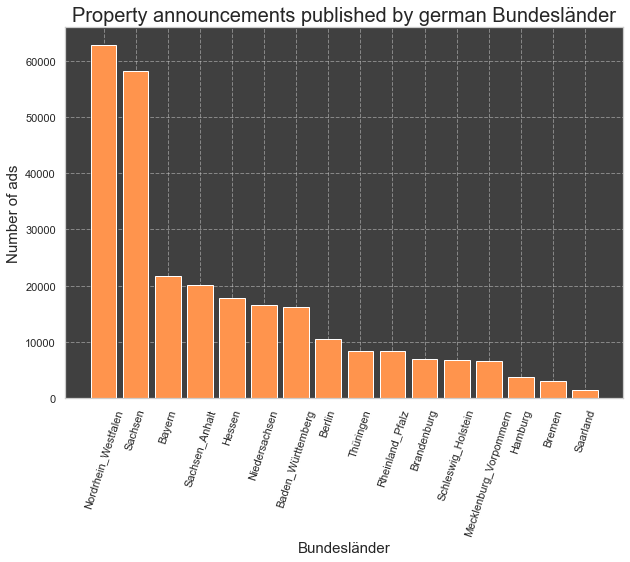

In [102]:
fig = plt.figure(figsize = (10,15))
ax1 = fig.add_subplot(2,1,1)
ax1.bar(bundesland_sorted['regio1'], bundesland_sorted['date'], color ='#ff944d')
plt.xticks(rotation=72)
ax1.set_facecolor('#404040')
ax1.grid(linestyle='--', alpha = 0.5)
ax1.set_title('Property announcements published by german Bundesländer', fontsize = 20)
ax1.set_xlabel('Bundesländer', fontsize =15)
ax1.set_ylabel('Number of ads', fontsize = 15)

In [103]:
mask = (housing.regio1 == 'Nordrhein_Westfalen') & (housing.typeOfFlat == 'apartment')
housing1= housing[mask]
housing1 = housing1[['regio1', 'heatingType', 'totalRent','yearConstructed','noParkSpaces', 'baseRent', 'livingSpace','noRooms', 'numberOfFloors','regio3', 'heatingCosts']]
housing1.shape

(33957, 11)

<h2> 4. Exploratory Data Analysis (EDA) </h2>


In [104]:
housing

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.00,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.90,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,910.0,2016.0,115641081,1.0,geothermal,False,Bayern,True,9.0,820.0,NaN,90.00,Weilheim_Schongau_Kreis,mint_condition,sophisticated,no,no_information,NaN,False,6,roof_storey,82390,3.0,NaN,NaN,NaN,3,False,4,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,1150.0,1983.0,96981497,1.0,gas,True,Hessen,False,4.0,930.0,NaN,115.00,Bergstraße_Kreis,well_kept,sophisticated,negotiable,no_information,NaN,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,5,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,930.0,1965.0,66924271,1.0,gas,False,Hessen,True,2.0,650.0,10,95.00,Limburg_Weilburg_Kreis,well_kept,NaN,negotiable,Emsbachstrasse,Emsbachstrasse,False,5,apartment,65552,4.0,160.77,1.0,2.0,4,True,4,Limburg_Weilburg_Krei

In [105]:
housing.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,baseRent,livingSpace,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,2.688500e+05,268850.000000,268850.000000,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,6.941294e+02,74.355548,37283.022235,2.641261,114.749533,2.122405,3.572319,2.571542,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,1.953602e+04,254.759208,27798.037296,2.633440,61.653663,3.634934,6.375496,0.937594,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,0.000000e+00,0.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,3.380000e+02,54.000000,9128.000000,2.000000,79.000000,1.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,4.900000e+02,67.320000,38667.000000,3.000000,107.000000,2.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,7.990000e+02,87.000000,57072.000000,3.000000,140.300000,3.000000,4.000000,3.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,9.999999e+06,111111.000000,99998.000000,999.990000,1996.000000,999.000000,999.000000,5.000000,12613.000000,2919.000000,90.760000,0.227600


In [106]:
data_min, data_max = rent_costs.min(), rent_costs.max()
quartiles = percentile(rent_costs, [25, 50, 75])
#print 5-number summary
print('Min: %.0f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.0f' % quartiles[1])
print('Q3: %.0f' % quartiles[2])
print('Max: %.0f' % data_max)

NameError: name 'rent_costs' is not defined

In [107]:
mean_m2=housing.livingSpace.mean()
print("The square meters mean is: "+mean_m2)
median_m2=housing.livingSpace.median()
mode_m2=housing.livingSpace.mode()
variance_m2= np.var(housing.livingSpace)
std_m2=np.std(housing.livingSpace)
print(mean_m2,median_m2,mode_m2)
print(variance_m2,std_m2)

TypeError: can only concatenate str (not "float") to str

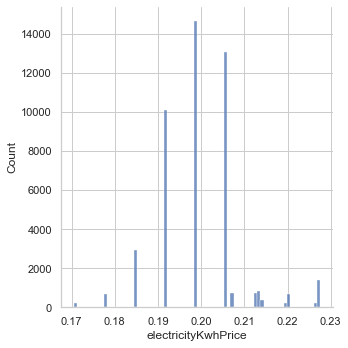

In [108]:
sns.displot(housing.electricityKwhPrice)

KeyboardInterrupt: 

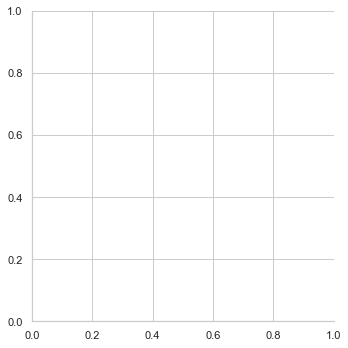

In [109]:
housing_year= housing[(housing.yearConstructed>1800)]
sns.displot(housing_year)

In [ ]:
sns.displot(housing.baseRentRange)

In [ ]:
housing.regio1.head()

In [ ]:
housing_prueba = housing.loc[(housing['regio1']=='Nordrhein_Westfalen')  & (housing['regio2']=='Münster') & (housing['regio3']=='Kreuzviertel') , ['serviceCharge','totalRent']]
housing_prueba.head()

In [ ]:
sns.histplot(housing_prueba.totalRent)

In [ ]:
housing_berlin = housing.loc[(housing['regio1']=='Berlin') & (housing['regio2']=='Berlin'), ['serviceCharge','totalRent']]
housing_berlin.head()

In [ ]:
sns.histplot(housing_berlin.totalRent)

In [ ]:
sns.hisplot(housing['totalRent'])


In [ ]:
sns.histplot(housing.totalRent[totalRent >=400])

In [ ]:
housing2= housing[(housing.totalRent < 2000) & (housing.totalRent>0)]
housing2= housing2[(housing2.livingSpace <150)& (housing2.livingSpace>0)]
sns.scatterplot(data=housing2, x="livingSpace", y="totalRent")


In [ ]:
# Let’s try using a random 5% of the data: 
perc = 0.05
housing_sub = housing2.sample(n = int(housing2.shape[0]*perc))
sns.scatterplot(data=housing_sub, x="livingSpace", y="totalRent")


In [ ]:
sns.scatterplot(data=housing2, x="livingSpace", y="totalRent", s=10)

In [ ]:
sns.scatterplot(data=housing2, x="livingSpace", y="totalRent", hue="typeOfFlat", style="typeOfFlat")

In [ ]:
sns.scatterplot(data=housing2, x="livingSpace", y="totalRent",alpha=0.15)


In [ ]:
g1 = sns.lmplot(x="totalRent", y="livingSpace", data=housing2,line_kws={'color': 'black'}, lowess=True)


We can watch how the price has a linear relationship between total rent and living space, however the step of the curv changes when the living space is over 60 square meters 

In [ ]:
sns.lmplot(x='livingSpace', y='totalRent', data = housing2, line_kws={'color': 'black'}, lowess=True)

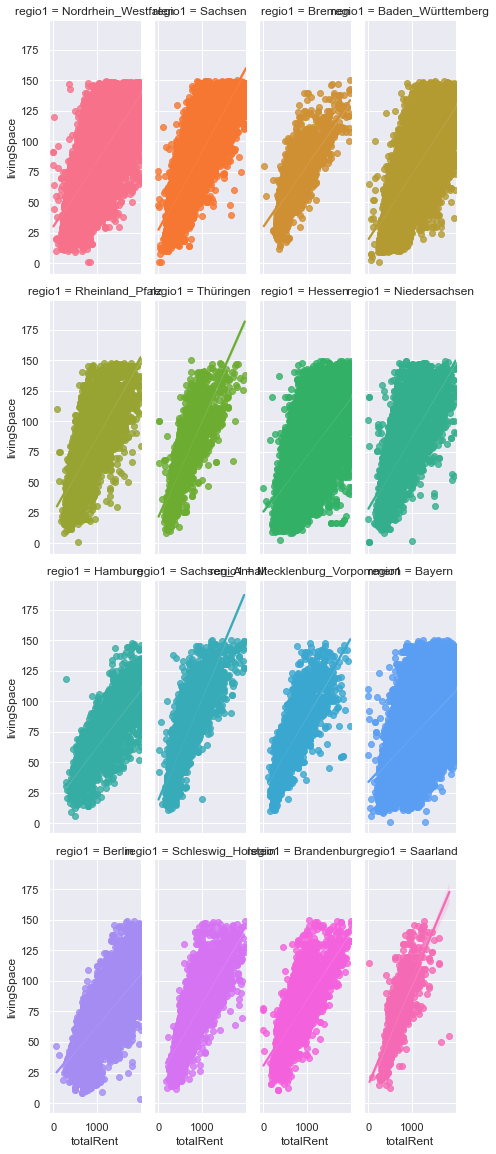

In [53]:
g = sns.lmplot(x="totalRent", y="livingSpace", hue="regio1", col="regio1",
               data=housing2, col_wrap=4,height=4, aspect=.4, x_jitter=.1)

/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newlyConst', ylabel='hasKitchen'>

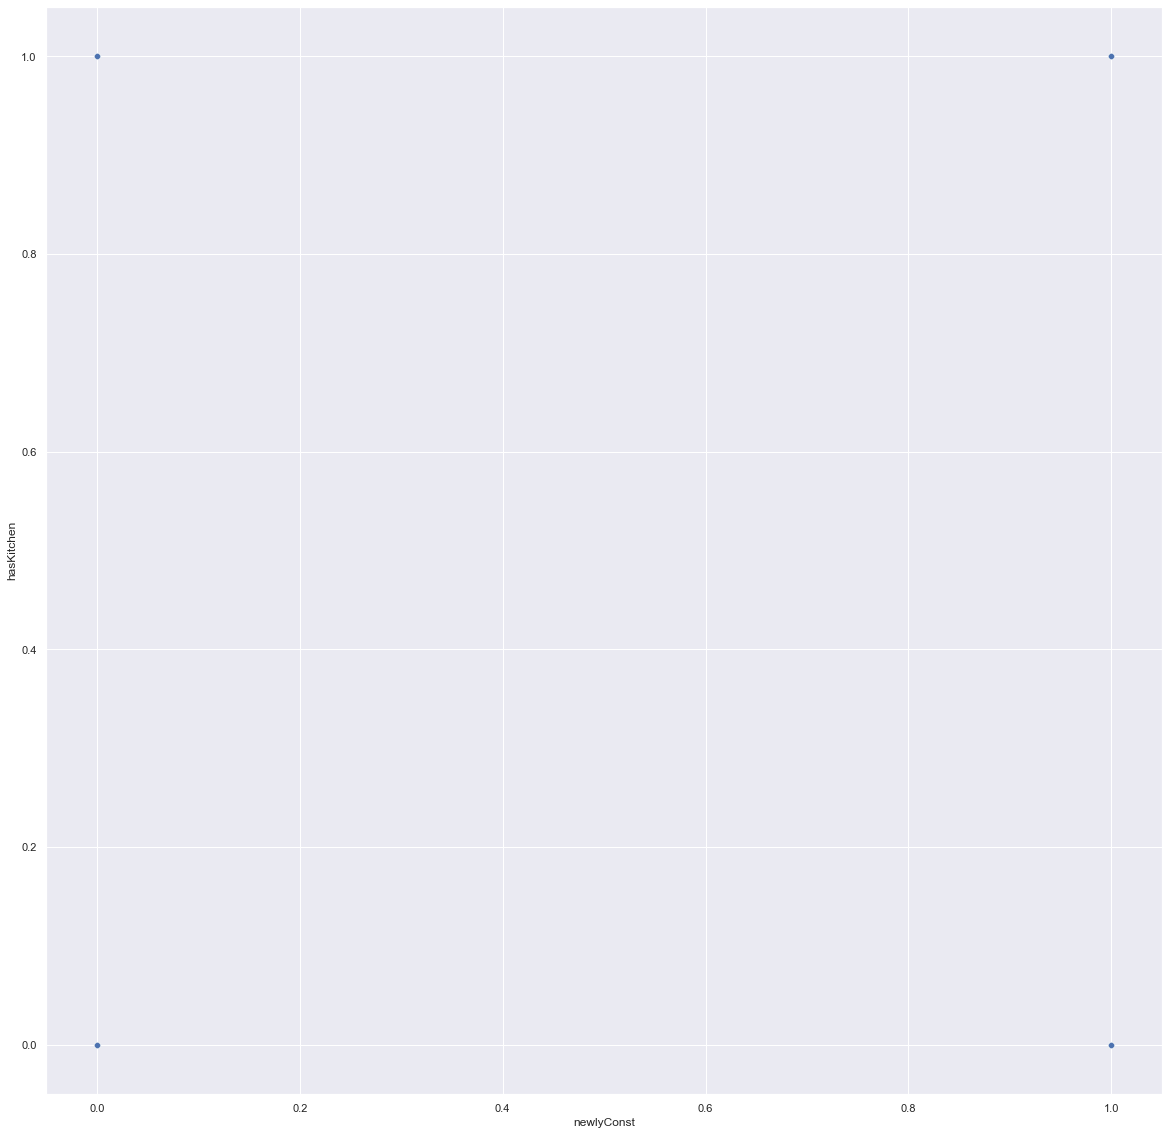

In [64]:
sns.scatterplot('newlyConst','hasKitchen',data=housing)

We can see how Bayern and Nordrhein Westphalen has the more variance between the line and the points to each side 

In [130]:
corr_matrix = housing_ohne_nan.corr()

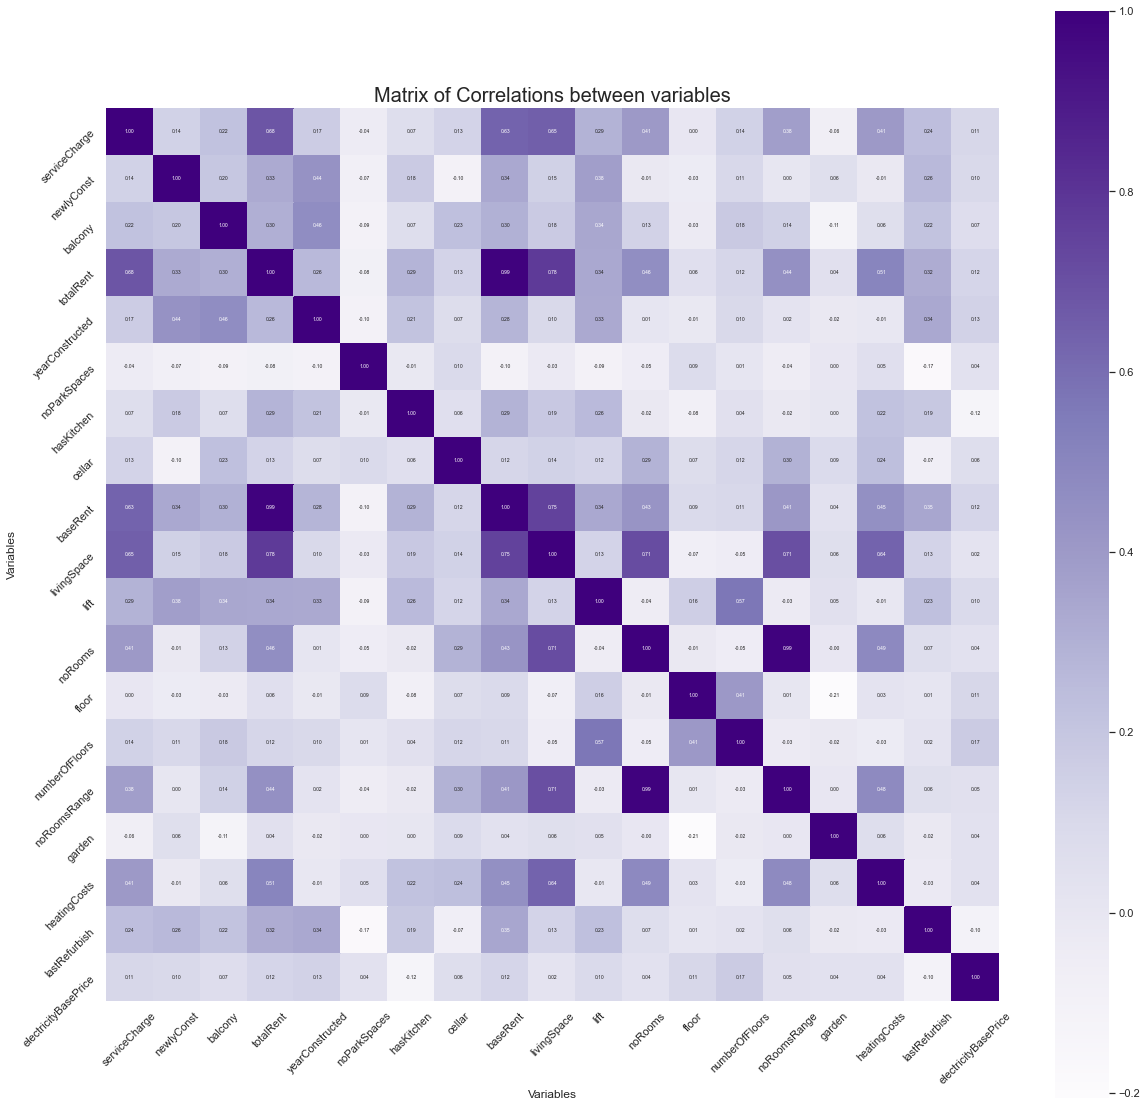

In [131]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, cbar=True, square= True, annot=True, fmt='.2f',annot_kws={'size':5},cmap='Purples')
plt.title('Matrix of Correlations between variables', fontsize=20)
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(rotation = 45)
plt.yticks(rotation =45)
plt.show()

In [21]:
corr_matrix2= housing.corr()

<AxesSubplot:xlabel='yearConstructed', ylabel='totalRent'>

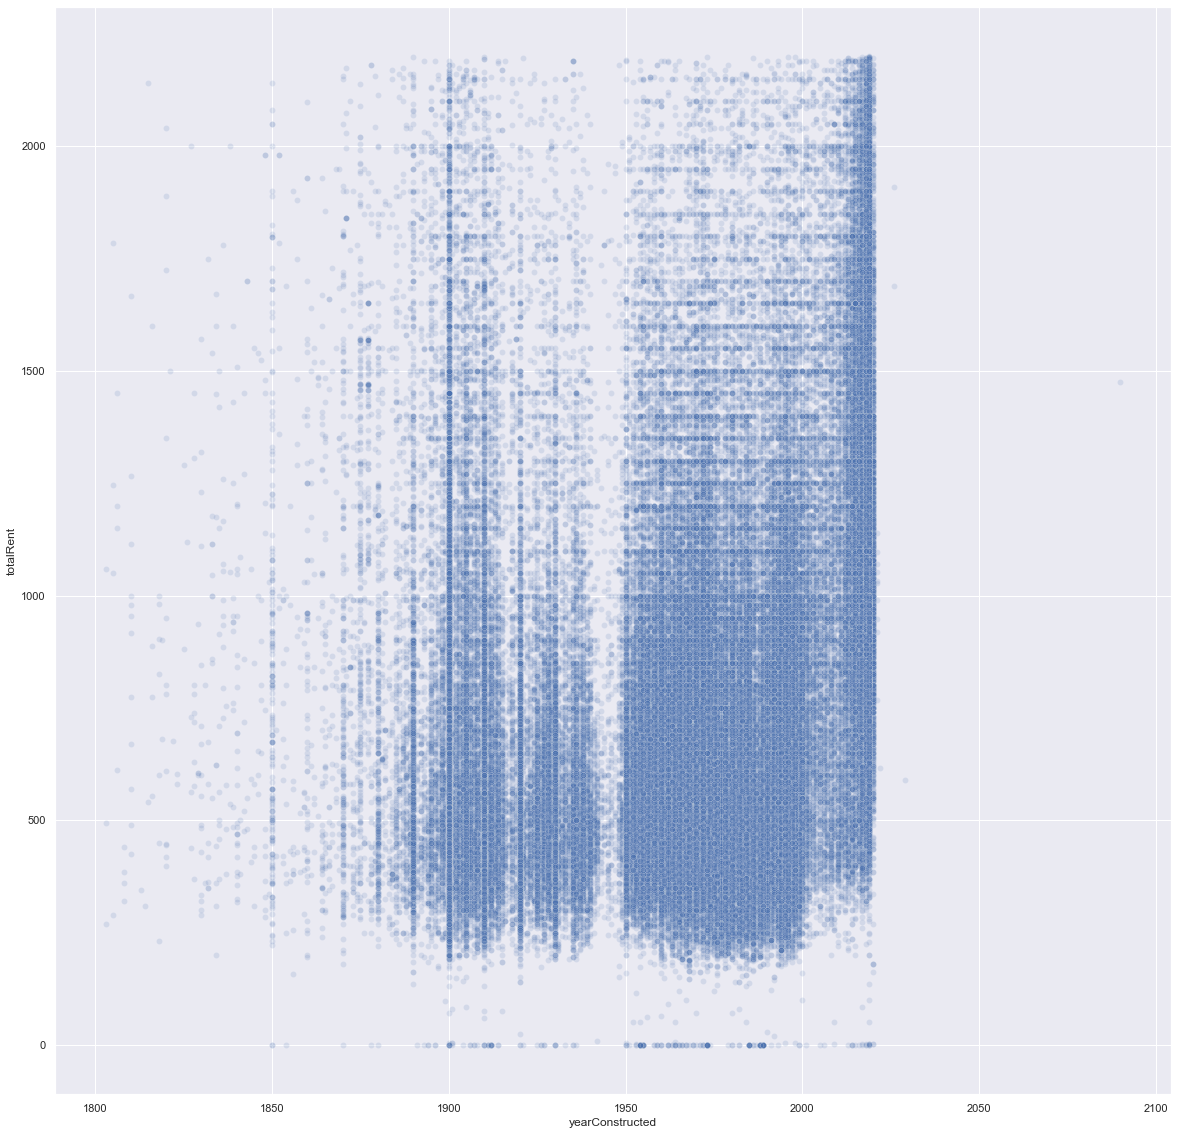

In [58]:
housing_year_con= housing[(housing.totalRent < 2200) & (housing.yearConstructed>1800)]
sns.scatterplot(data=housing_year_con, x="yearConstructed", y="totalRent",alpha=0.15)

#sns.scatterplot(x=housing['yearConstructed'],y=housing['totalRent'])

<AxesSubplot:>

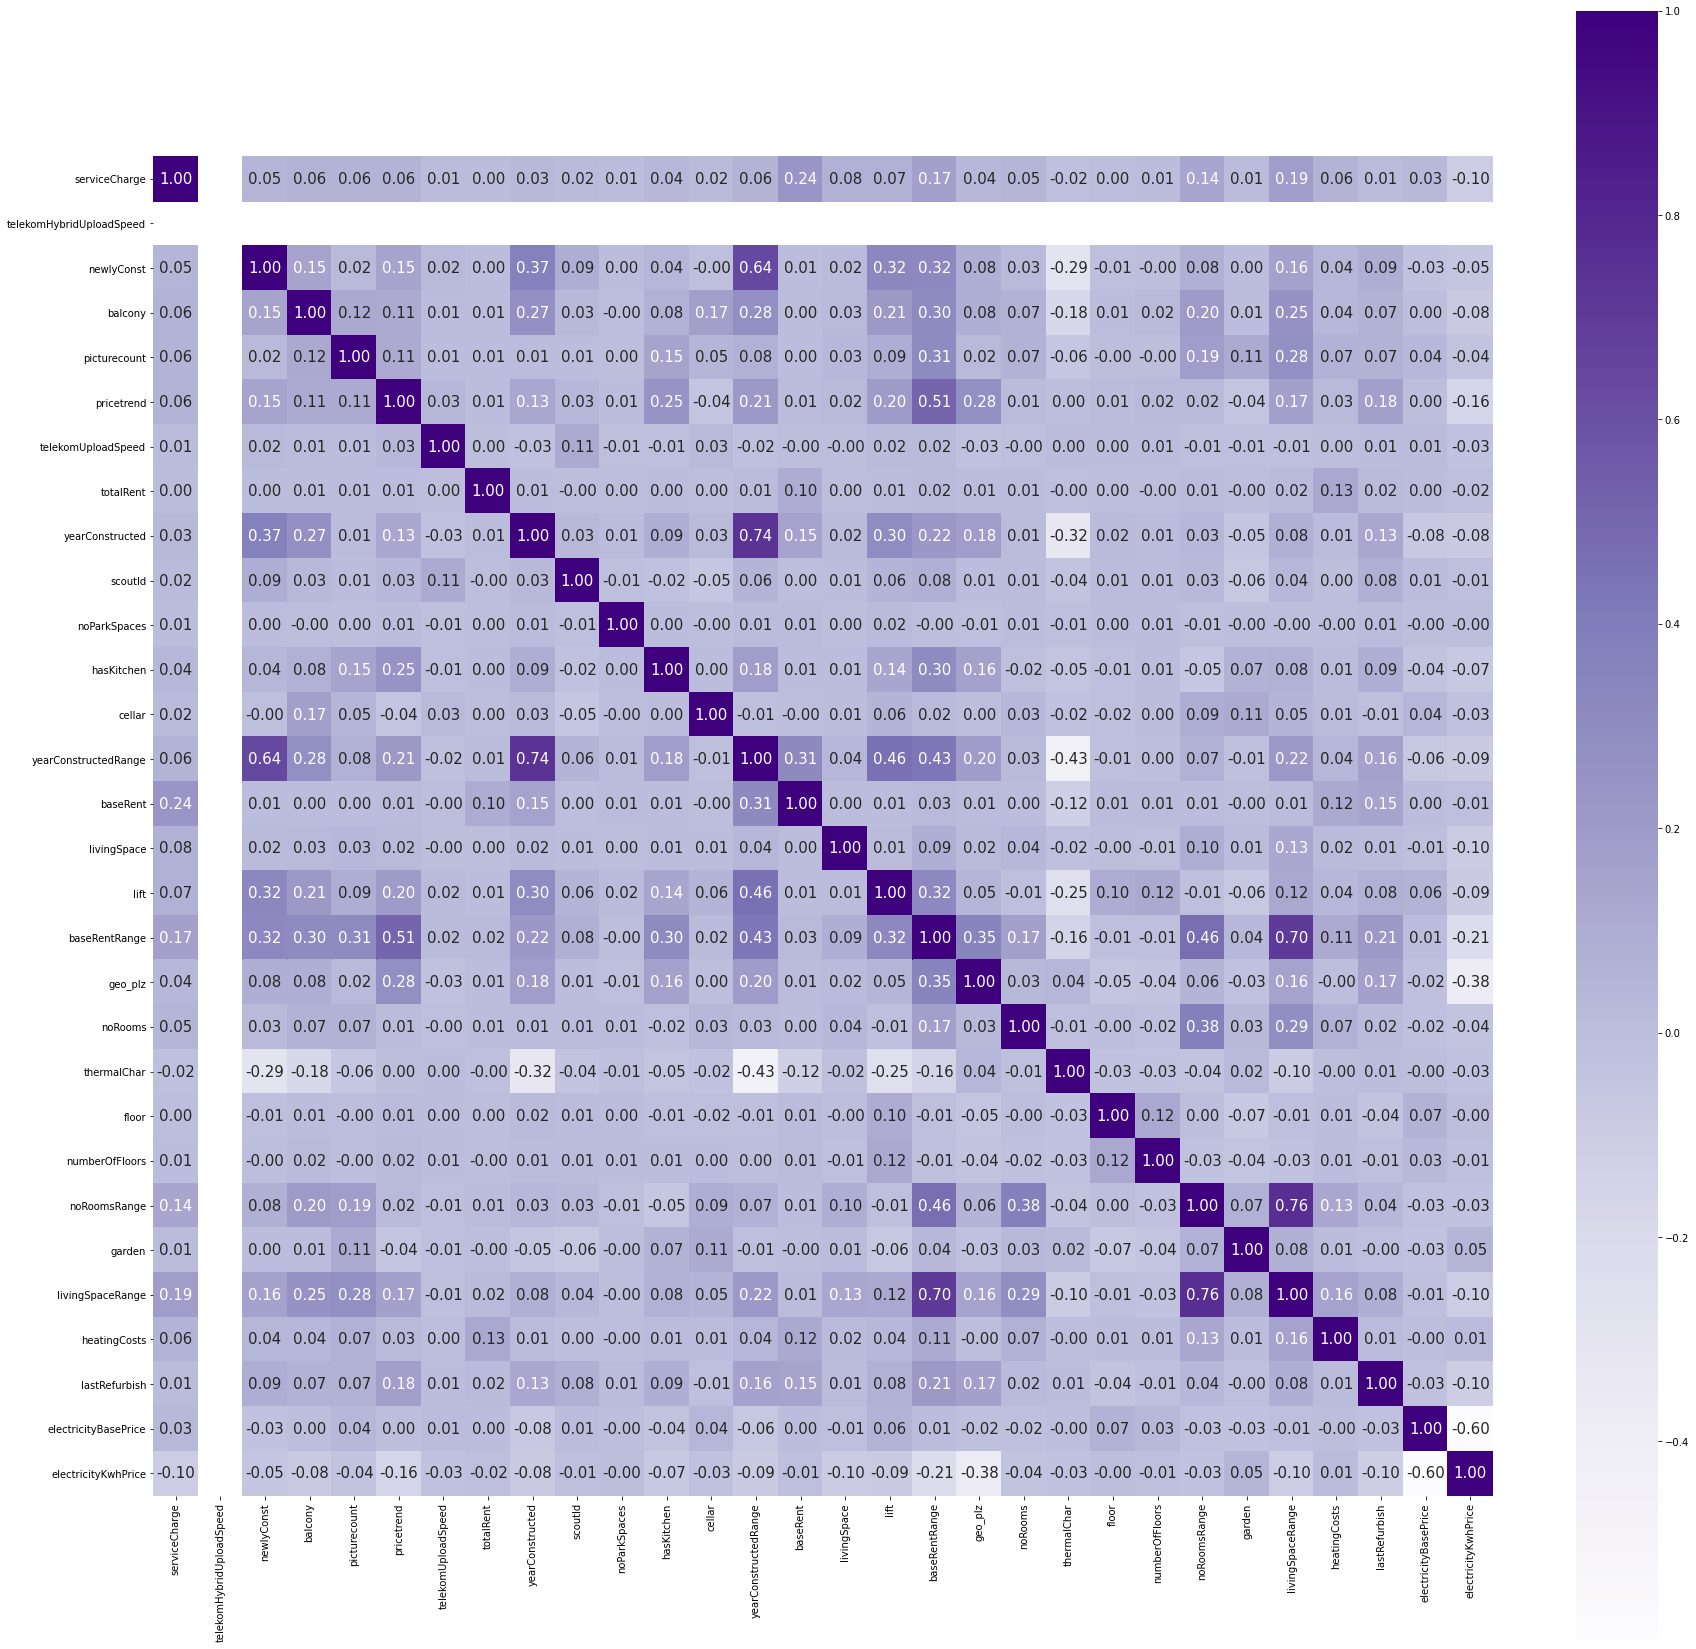

In [23]:
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix2, cbar=True, square= True, annot=True, fmt='.2f',annot_kws={'size':15},cmap='Purples')

In [24]:
print(housing.typeOfFlat.unique())

['ground_floor' 'apartment' 'other' nan 'roof_storey'
 'raised_ground_floor' 'terraced_flat' 'half_basement' 'maisonette'
 'penthouse' 'loft']


yearConstructed maximum value is 2090 which hasnt yet come

In [ ]:
rent_cost=housing['totalRent']

In [ ]:
rent_costs=rent_cost[~pd.isnull(rent_cost)]


In [ ]:
fig, axs = plt.subplots(figsize=(7,3), dpi=100)
plt.subplot(1,2,1)
sns.histplot(housing['totalRent']).set_title('Distibution of Rent Prices', weight='bold')

In [ ]:
sns.histplot(
    housing.baseRent,
    x="H", hue="date",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

In [ ]:

plt.figure(figsize=[12,4])
sns.distplot(housing['yearConstructed'], color='red')
plt.title('Year of Construction')
plt.show()

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    housing['totalRent'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='totalRent', ylabel='date');

In [ ]:
sns.distplot(housing['totalRent'], bins=3, kde=True, rug=True)


Separation of data into training and test sets

In [15]:
X = housing.drop(['totalRent'],axis =1)
y= housing['totalRent']

In [16]:
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=72,test_size= 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(215080, 48) (53770, 48) (215080,) (53770,)


In [19]:
# Decision Tree Model.
reg_tree = DecisionTreeRegressor(random_state = 42)
reg_tree.fit(X_train, y_train)

y_tree_train_predict = reg_tree.predict(X_train)
y_tree_test_predict = reg_tree.predict(X_test)

tree_r2_train = r2_score(y_train, y_tree_train_predict)
tree_r2_test = r2_score(y_test, y_tree_test_predict)

print('Maximum depth of the model:', reg_tree.get_depth())

ValueError: could not convert string to float: 'Sachsen'